# **Project:** E-Commerce Customer Churn Analysis

## **Overview:**
Businesses in the E-Commerce sector, especially those in the business-to-consumer segment, are engaged in fierce competition for survival, trying to gain access to their rivals’ client bases while keeping current customers from defecting. The cost of acquiring new customers is rising as more competitors join the market with significant upfront expenditures and cutting-edge penetration strategies, making client retention essential for these organizations. The best course of action in this circumstance is to detect prospective churning customers and prevent churn with temporary retention measures. It’s also essential to understand why the customer decided to go away to apply customized win-back strategies. Each customer’s information, including searches made, purchases made, frequency of purchases, reviews left, feedback is given, and other data, is kept on file by the e-commerce company. Machine learning and data mining may be aided by examining this enormous quantity of data, analysing customer behaviour, and seeing potential attrition opportunities. Therefore, this project aims to provide a more comprehensive approach to customer churn prediction, utilizing 2 models with 3 different null values filling method in comparison. The result is presented as below.
## **Table of Contents**
* [Phase 1](#section-one)
    - [Exploratory Data Analysis](#subsection-one)
    - [Figuring Out Null Values](#subsection-two)
    - [Figuring Out Duplicate Values](#subsection-three)
    - [Quick Statistical Overview](#subsection-four)
* [Phase 2: Data Cleansing](#section-two)
    - [Handling/Figuring out outliers](#subsection-five)
    - [Handling/Figuring out null values and Handling/Figuring out wrong values](#subsection-six)
* [Feature Engineering](#section-three)
* [Phase 3: Handling nulls](#section-four)
    - [Method 1: Dropping nulls](#subsection-seven)
    - [Method 2: Filling nulls with Multivariate Imputation By Chained Equations algorithm](#subsection-eight)
    - [Method 3: Filling nulls with interpolate in Pandas that could predict the nulls using the correlation with other columns.](#subsection-nine)
    - [Modeling Conclusion](#subsection-ten)
* [Data Analysis and Recommendations](#section-four)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [3]:
#Reading the dataset
df = pd.read_excel(r"C:\Users\Khoi\Desktop\churn_prediction.xlsx")
OnlineRetail = df.copy() #Taking a copy of the data

In [4]:
#Retrieving the first 10 rows
OnlineRetail.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


<a id="section-one"></a>
# **Phase 1** 

<a id="subsection-one"></a>
## **Exploratory Data Analysis** 

In [5]:
#Making Sure there are no inconsistent columns
OnlineRetail.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
OnlineRetail.shape #Figuring out the shape of the data

(5630, 20)

In [10]:
OnlineRetail.info() #Figuring out columns' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<a id="subsection-two"></a>
## **Figuring Out Null Values**

In [11]:
OnlineRetail.isnull().sum() #Figuring out the number of null values in each column

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<a id="subsection-three"></a>
## **Figuring Out Duplicate Values**

In [12]:
OnlineRetail.pivot_table(index=['CustomerID'], aggfunc ='size') #Figuring Out if there are any duplicates in column CustomerID

CustomerID
50001    1
50002    1
50003    1
50004    1
50005    1
        ..
55626    1
55627    1
55628    1
55629    1
55630    1
Length: 5630, dtype: int64

In [13]:
OnlineRetail.duplicated().sum() #Figuring out if there are any duplicate values (on row level)

0

<a id="subsection-four"></a>
## **Quick Statistical Overview**

In [14]:
OnlineRetail.describe() #Quick Descriptive Summary (Numeric Data Type based)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [15]:
OnlineRetail.describe(include='object') #Quick Descriptive Summary (Object Data Type based)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


# **Phase One Initial Conclusion:**

- The dataset contains 20 columns, 7 of which has null values, listed as the following:
	`Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`

- The dataset has no duplicate values on row level.

- All columns have the right data type *(There's no need for data type conversion)*

- Quick statistical summary indicates that there could be potential outliers in:
	`Tenure`, `WarehouseToHome`, `SatisfactionScore`, `NumberOfAddress`, `CouponUsed`,
	`DaySinceLastOrder`



---
<a id="section-two"></a>
# **Data Cleansing**

<a id="subsection-five"></a>
## **Handling/Figuring out outliers**

**Column: Tenure**

In [16]:
OnlineRetail['Tenure'].sort_values(ascending=True).value_counts() #Figuring out if there are extreme values

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
51.0      1
60.0      1
61.0      1
Name: Tenure, dtype: int64

In [17]:
#Tenure column has extrem unlogical value below 0 and outliers starting from a value of 50.0+
OnlineRetail = OnlineRetail[OnlineRetail['Tenure'] < 50.0] #Excluding values above 50.0

In [18]:
OnlineRetail['Tenure'].unique() #Validating the changes

array([ 4.,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
        1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15., 22.,
       27., 16., 12., 21., 17., 31.])

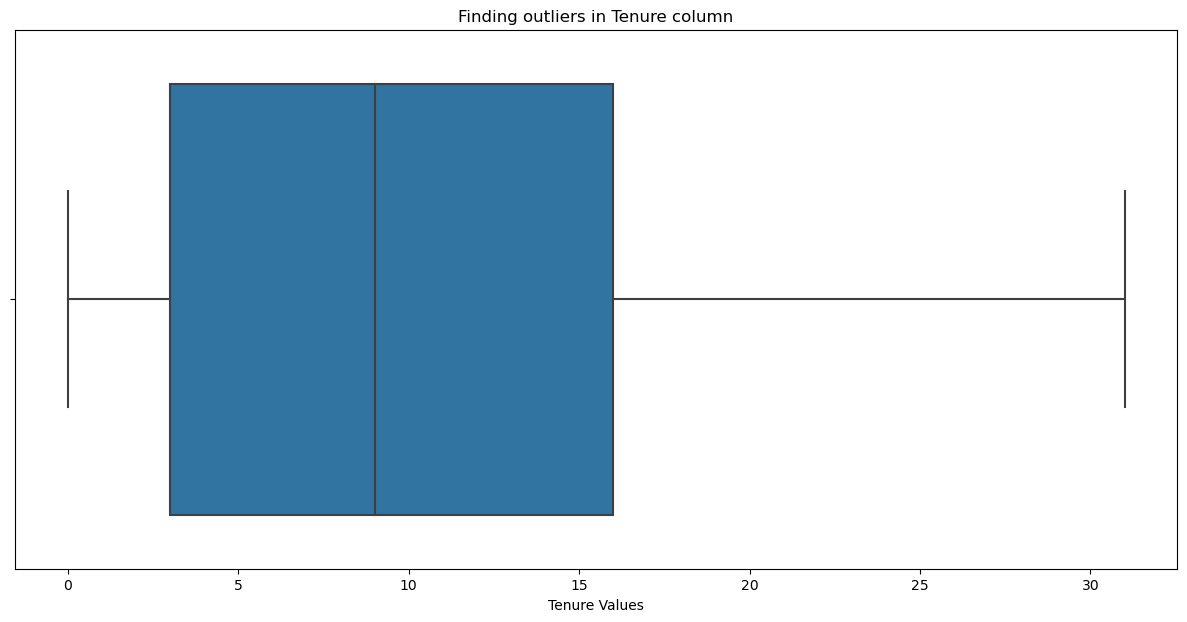

In [216]:
#Further Tenure column outliers configuration
plt.figure(figsize=(15,7))
Tenure_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['Tenure'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('Tenure Values', color='black')
Tenure_ax.set_title('Finding outliers in Tenure column',color= 'black')
plt.show()



---



**Column: WarehouseToHome**

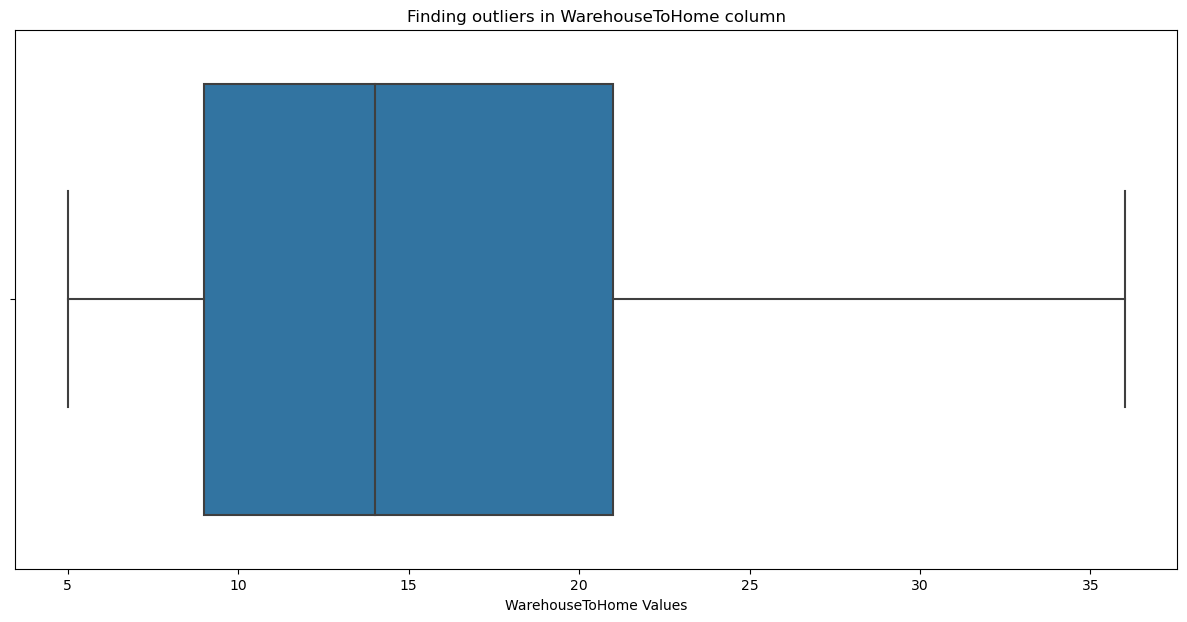

In [217]:
#Detecting Outliers WarehouseToHome Column
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('WarehouseToHome Values', color='black')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'black')
plt.show()

In [21]:
OnlineRetail['WarehouseToHome'].value_counts()

9.0      536
8.0      417
7.0      375
16.0     305
14.0     286
15.0     269
10.0     269
6.0      258
13.0     233
11.0     223
17.0     213
12.0     211
22.0     100
31.0      96
35.0      93
32.0      92
30.0      90
23.0      88
18.0      87
25.0      86
24.0      83
26.0      81
21.0      80
29.0      78
27.0      72
20.0      70
19.0      69
33.0      65
28.0      64
34.0      61
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

In [22]:
#Column WarehouseToHome has outliers on values 126.0 and 127.0
OnlineRetail = OnlineRetail[OnlineRetail['WarehouseToHome'] < 126.0]

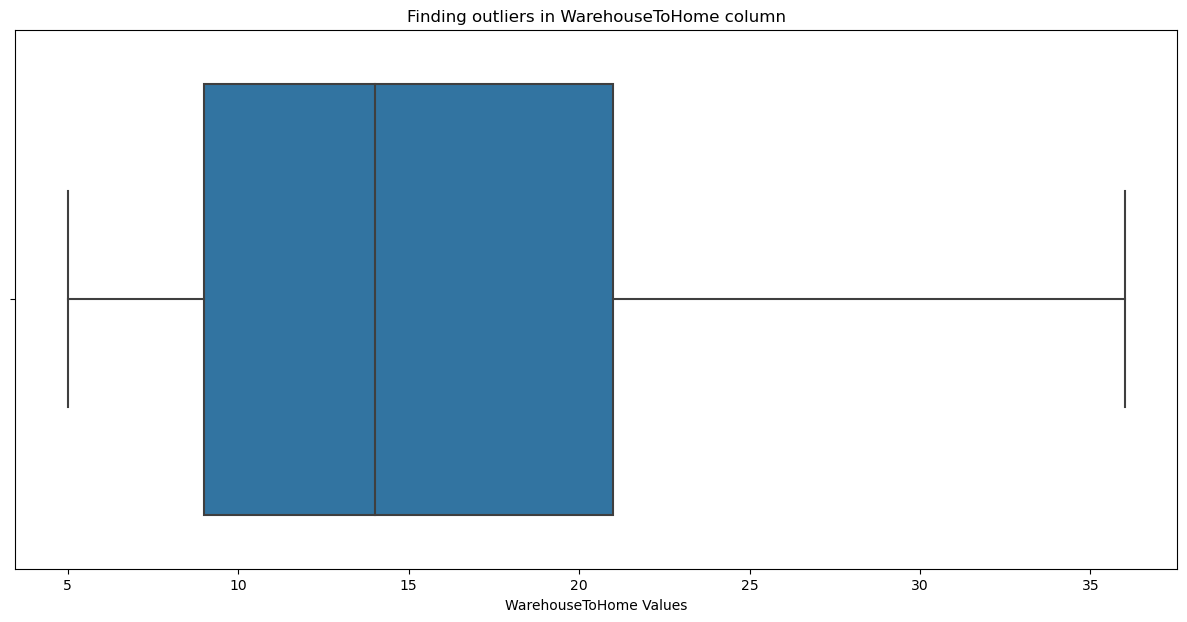

In [218]:
#Validating the changes
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('WarehouseToHome Values', color='black')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'black')
plt.show()



---




**Column: SatisfactionScore**

In [24]:
OnlineRetail['SatisfactionScore'].value_counts() #Figuring out if there's extreme values

3    1539
1    1066
5    1008
4     958
2     538
Name: SatisfactionScore, dtype: int64

**There seems to be no extreme outliers, we will carry on with other columns**



---



**Column: NumberOfAddress**

In [29]:
OnlineRetail['NumberOfAddress'].value_counts() #Figuring out if there are extreme values

3     1246
2     1116
4      550
5      519
6      363
1      308
8      270
9      227
7      226
10     183
11      98
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

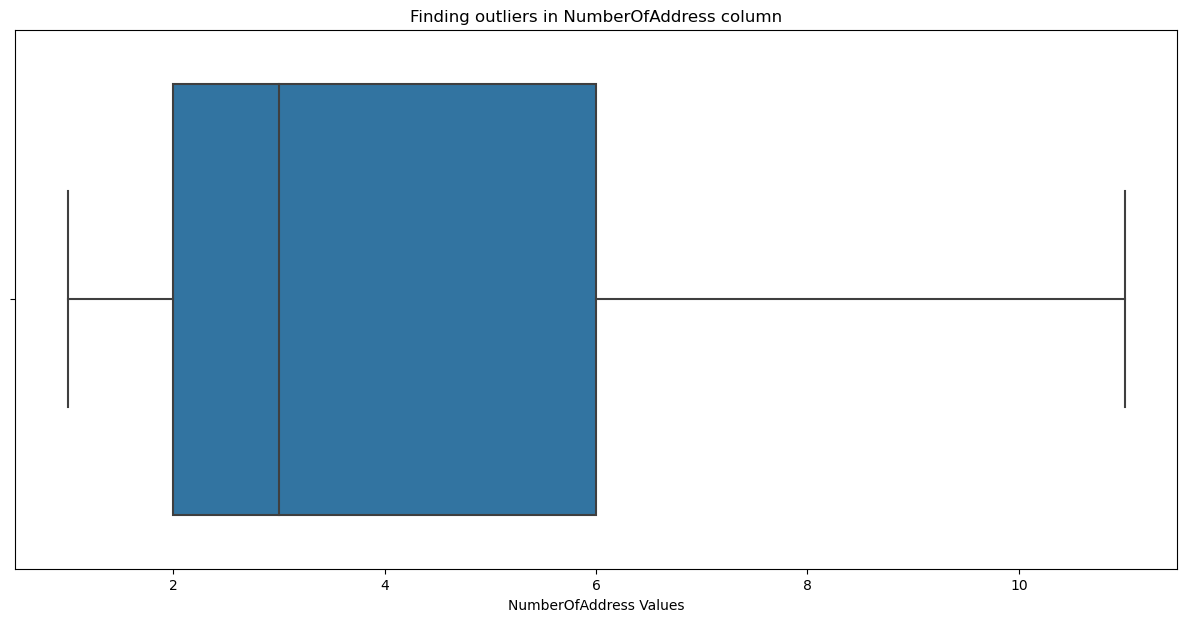

In [219]:
#Detecting Outliers NumberOfAddress Column
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('NumberOfAddress Values', color='black')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'black')
plt.show()

In [31]:
#Handling Extreme Values
OnlineRetail = OnlineRetail[OnlineRetail['NumberOfAddress'] < 20]

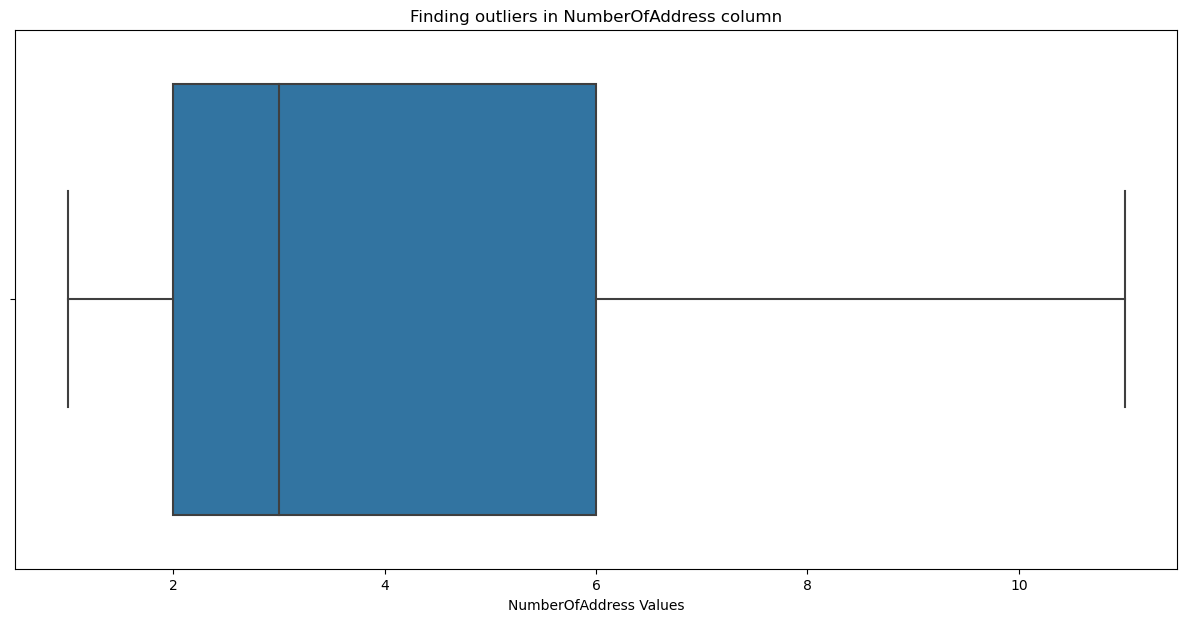

In [220]:
#Validating the changes
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('NumberOfAddress Values', color='black')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'black')
plt.show()



---



**Column: CouponUsed**

In [33]:
OnlineRetail['CouponUsed'].value_counts() #Figuring out if there are extreme values

1.0     1870
2.0     1239
0.0      808
3.0      321
4.0      193
5.0      125
6.0      102
7.0       87
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: CouponUsed, dtype: int64

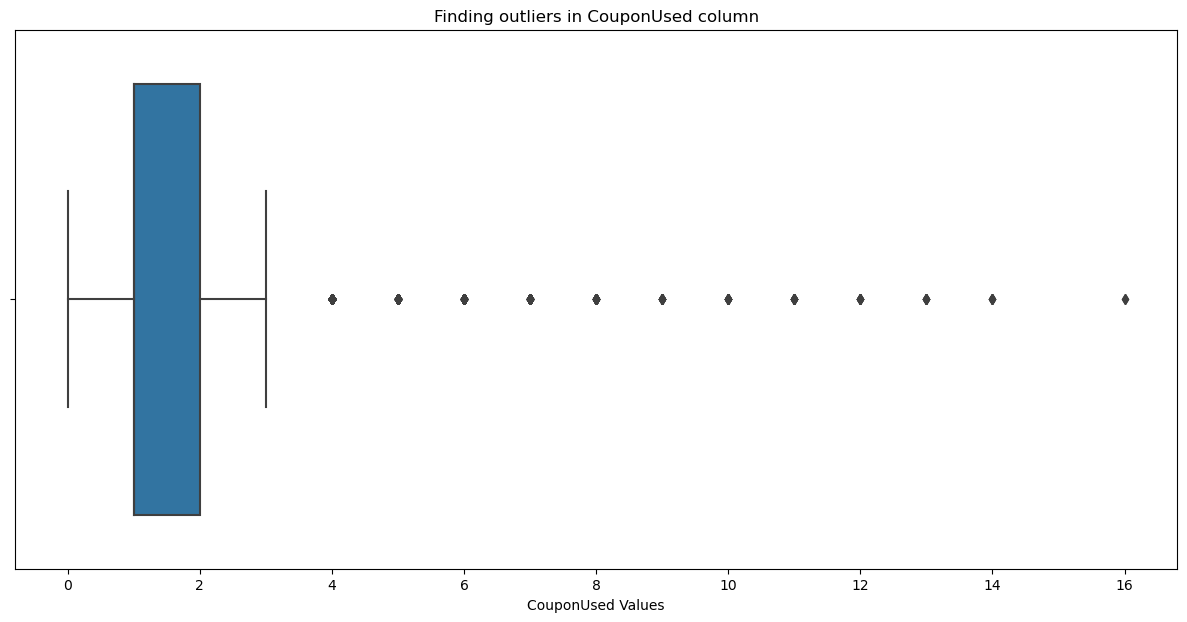

In [221]:
#Detecting outliers in CouponUsed Column
plt.figure(figsize=(15,7))
CouponUsed_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CouponUsed'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('CouponUsed Values', color='black')
CouponUsed_ax.set_title('Finding outliers in CouponUsed column',color= 'black')
plt.show()

***Outliers in column `CouponUsed` don't represent wrong measurement and they could provide useful information, Hence, I've decided to leave them***



---



**Column: DaySinceLastOrder**

In [35]:
OnlineRetail['DaySinceLastOrder'].value_counts() #Figuring Out if there are extreme values.

3.0     848
2.0     636
1.0     577
8.0     524
7.0     407
4.0     403
0.0     322
9.0     294
5.0     220
10.0    157
6.0     107
11.0     91
12.0     69
13.0     49
14.0     35
15.0     17
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

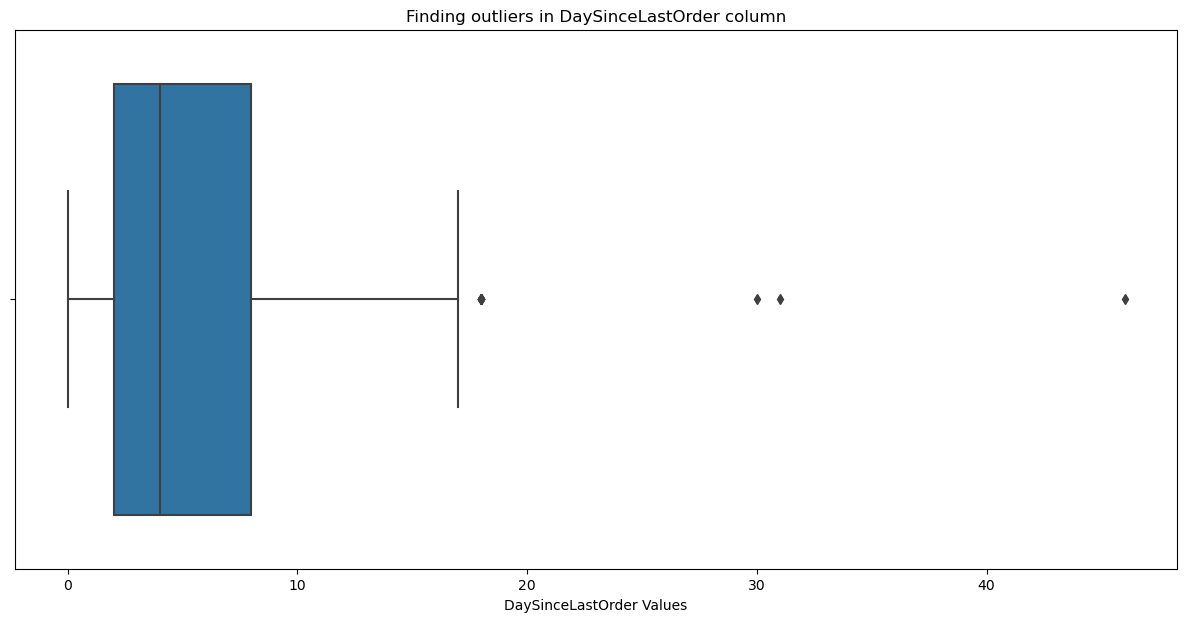

In [222]:
#There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.
plt.figure(figsize=(15,7))
DaySinceLastOrder_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['DaySinceLastOrder'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('DaySinceLastOrder Values', color='black')
DaySinceLastOrder_ax.set_title('Finding outliers in DaySinceLastOrder column',color= 'black')
plt.show()

**There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.**



---



## **Outliers Conclusion:**
**As Expected, There were outliers in columns:** 	`Tenure`, `WarehouseToHome`, `NumberOfAddress`, `CouponUsed`, `DaySinceLastOrder`

  **Now, Let's make sure that the other columns don't contain outliers.**
  `Churn`, `CityTier`, `HoursSpendOnApp`, `NumberOfDeviceRegistered`, `Complain`, `OrderAmountHikeFromlastYear`, `CashbackAmount`



---



**Column: Churn**

In [37]:
OnlineRetail['Churn'].value_counts() #Figuring Out if there are extreme values.

0    4324
1     782
Name: Churn, dtype: int64

**Column: CityTier**

In [38]:
OnlineRetail['CityTier'].value_counts() #Figuring Out if there are extreme values.

1    3259
3    1637
2     210
Name: CityTier, dtype: int64

**Column: HoursSpendOnApp**

In [39]:
OnlineRetail['HourSpendOnApp'].value_counts() #Figuring Out if there are extreme values.

3.0    2447
2.0    1193
4.0    1172
1.0      33
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64

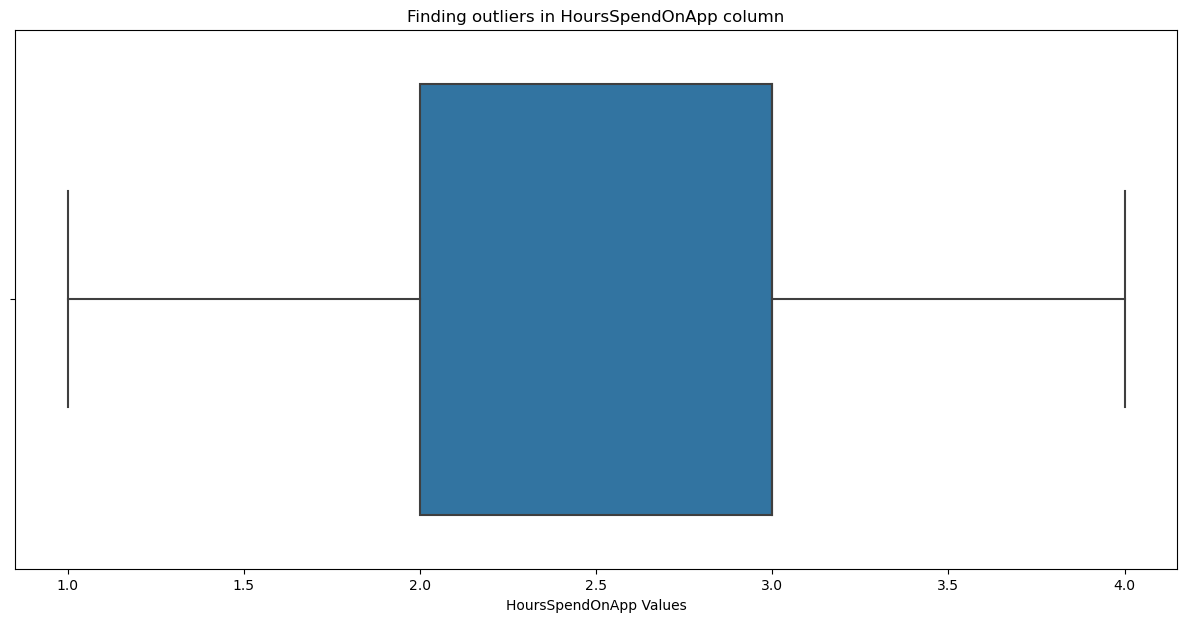

In [223]:
#Visualizing outliers using BoxPlot
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('HoursSpendOnApp Values', color='black')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'black')
plt.show()

In [41]:
#Handling outliers
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] > 0.0]
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] < 5.0]

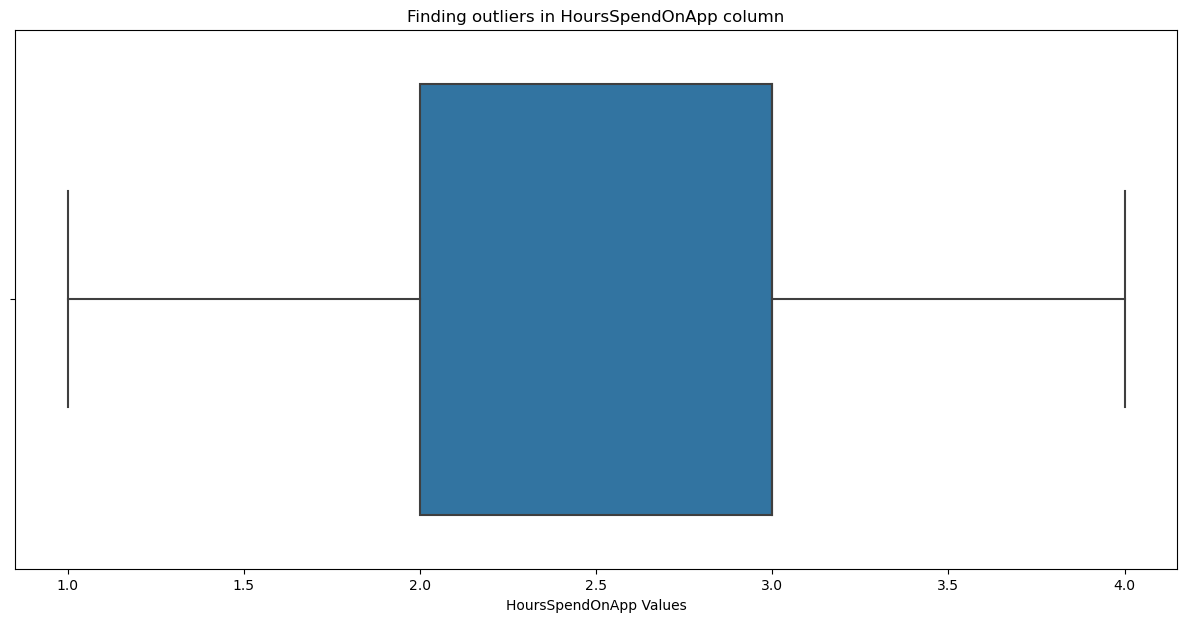

In [224]:
#Validating the changes
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('HoursSpendOnApp Values', color='black')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'black')
plt.show()

**Column: NumberOfDeviceRegistered**

In [43]:
OnlineRetail['NumberOfDeviceRegistered'].value_counts() #Figuring Out if there are extreme values.

4    2174
3    1235
5     841
2     267
1     166
6     162
Name: NumberOfDeviceRegistered, dtype: int64

**Column: Complain**

In [44]:
OnlineRetail['Complain'].value_counts() #Figuring Out if there are extreme values.

0    3469
1    1376
Name: Complain, dtype: int64

**Column: OrderAmountHikeFromlastYear**

In [45]:
OnlineRetail['OrderAmountHikeFromlastYear'].value_counts() #Figuring Out if there are extreme values.

14.0    643
12.0    637
13.0    622
15.0    496
11.0    295
16.0    279
18.0    273
19.0    267
17.0    258
20.0    201
21.0    164
22.0    152
23.0    129
24.0     68
25.0     64
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

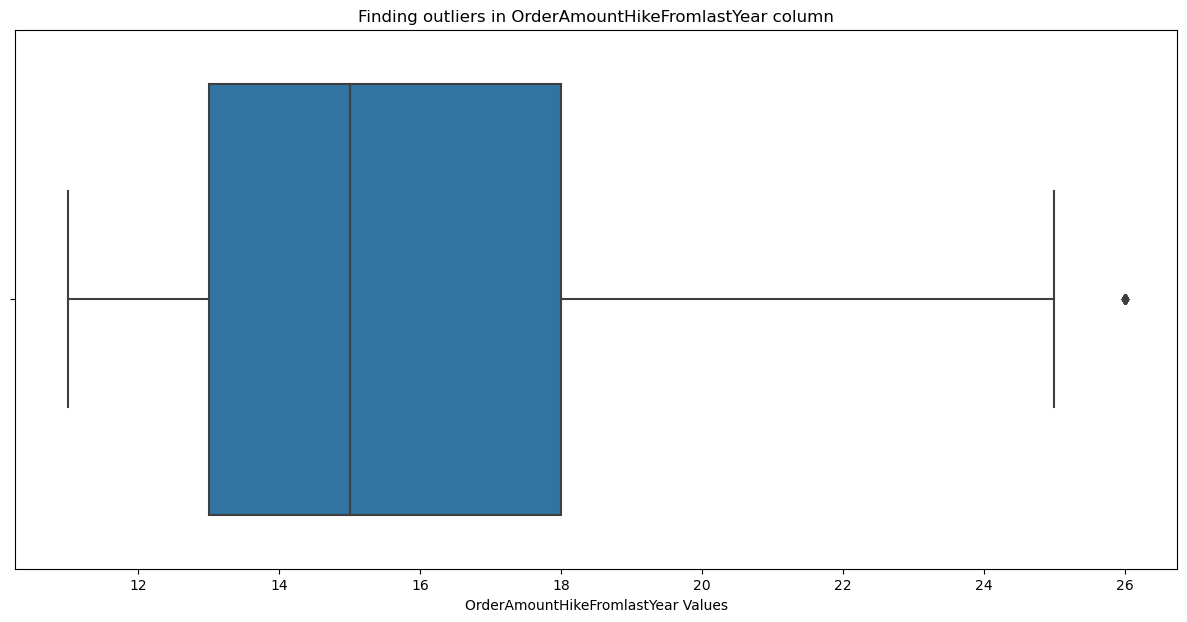

In [225]:
plt.figure(figsize=(15,7))
OrderAmountHikeFromlastYear_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['OrderAmountHikeFromlastYear'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='black')
OrderAmountHikeFromlastYear_ax.set_title('Finding outliers in OrderAmountHikeFromlastYear column',color= 'black')
plt.show()
#Since this column presents the increase percentage, Outliers is not problematic in this case

**Column: CashbackAmount**

In [47]:
OnlineRetail['CashbackAmount'].value_counts().sort_index() #Figuring Out if there are extreme values.

0.00      4
12.00     1
25.00     4
37.00     1
56.00     1
         ..
323.59    2
324.26    2
324.43    2
324.73    2
324.99    2
Name: CashbackAmount, Length: 2243, dtype: int64

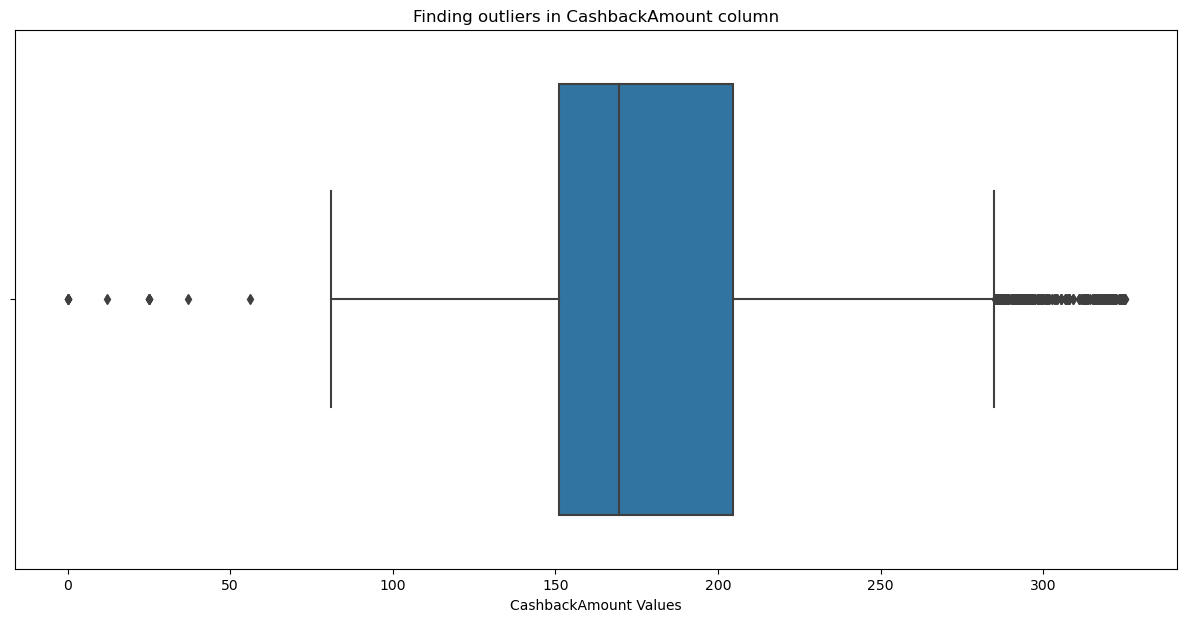

In [226]:
#Detecting outliers in CashbackAmount
plt.figure(figsize=(15,7))
CashbackAmount_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CashbackAmount'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('CashbackAmount Values', color='black')
CashbackAmount_ax.set_title('Finding outliers in CashbackAmount column',color= 'black')
plt.show()

**Since this column represents an average cash back amount on monthly basis, it is normal to be a fluctuated amount and hence the outliers could be left as it is.**



---



 <a id="subsection-six"></a>
 ## **Handling/Figuring out null values and Handling/Figuring out wrong values**

In [49]:
OnlineRetail.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    264
CouponUsed                     255
OrderCount                     257
DaySinceLastOrder              306
CashbackAmount                   0
dtype: int64

# **Handling/Figuring wrong values**

In [50]:
OnlineRetail.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### **Column: Churn**

In [51]:
#Churn
OnlineRetail['Churn'].unique()

array([1, 0], dtype=int64)

### **Column: Tenure**

In [52]:
#Tenure
OnlineRetail['Tenure'].unique()

array([ 4.,  0., 11.,  9., 19., 20., 14.,  8.,  5.,  2., 30., 13., 23.,
        3., 18., 29., 26., 28.,  7., 24., 25., 10., 15., 22.,  1., 27.,
       16., 12.,  6., 21., 17., 31.])

### **Column: PreferredLoginDevice**

In [53]:
#PreferredLoginDevice
OnlineRetail['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

### **Column: CityTier**

In [55]:
#CityTier
OnlineRetail['CityTier'].unique()

array([3, 1, 2], dtype=int64)

### **Column: WarehouseToHome**

In [56]:
#WarehouseToHome
OnlineRetail['WarehouseToHome'].unique()

array([ 6., 15., 22., 18., 11., 13., 20., 12., 29., 26., 14., 10., 30.,
       17.,  8., 19.,  9., 27., 35., 24., 16., 33., 32., 23., 28., 31.,
       34.,  5., 21., 25.,  7., 36.])

### **Column: PreferredPaymentMode**

In [57]:
#PreferredPaymentMode
OnlineRetail['PreferredPaymentMode'].unique()

array(['Debit Card', 'Cash on Delivery', 'COD', 'CC', 'Credit Card',
       'E wallet', 'UPI'], dtype=object)

In [58]:
#Handling 'COD' and 'CC' values
OnlineRetail['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True) #Replacing COD with Cash On Delivery
OnlineRetail['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True) #Replacing CC with Credit Card
OnlineRetail['PreferredPaymentMode'].fillna(value='Other', inplace=True) #Replacing nan with Other

### **Column: Gender**

In [59]:
#Gender
OnlineRetail['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### **Column: HourSpendOnApp**

In [60]:
#HourSpendOnApp
OnlineRetail['HourSpendOnApp'].unique()

array([3., 2., 1., 4.])

### **Column: NumberOfDeviceRegistered**

In [61]:
#NumberOfDeviceRegistered
OnlineRetail['NumberOfDeviceRegistered'].unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

### **Column: PreferedOrderCat**

In [62]:
#PreferedOrderCat
OnlineRetail['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Mobile', 'Grocery'], dtype=object)

In [63]:
#Handling 'Mobile' value in PreferedOrderCat
OnlineRetail['PreferedOrderCat'].replace('Mobile','Mobile Phone',inplace=True)

### **Column: SatisfactionScore**

In [64]:
#SatisfactionScore
OnlineRetail['SatisfactionScore'].unique()

array([2, 5, 3, 4, 1], dtype=int64)

### **Column: MaritalStatus**

In [65]:
#MaritalStatus
OnlineRetail['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

### **Column: NumberOfAddress**

In [66]:
#NumberOfAddress
OnlineRetail['NumberOfAddress'].unique()

array([ 9,  8,  2, 10,  1,  5,  4,  3,  6,  7, 11], dtype=int64)

### **Column: Complain**

In [67]:
#Complain
OnlineRetail['Complain'].unique()

array([1, 0], dtype=int64)

### **Column: OrderAmountHikeFromlastYear**

In [68]:
#OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].unique()

array([11., 23., 22., nan, 13., 17., 16., 24., 18., 12., 15., 14., 20.,
       25., 19., 21., 26.])

### **Column: CouponUsed**

In [69]:
#CouponUsed
OnlineRetail['CouponUsed'].unique()

array([ 1.,  0.,  4.,  9.,  2.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13.,  8., 14., 16.])

### **Column: OrderCount**

In [70]:
#OrderCount
OnlineRetail['OrderCount'].unique()

array([ 1.,  6., 15.,  2.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

### **Column: DaySinceLastOrder**

In [71]:
#DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].unique()

array([ 5.,  3.,  7.,  8.,  0.,  2.,  6.,  4.,  9., 11.,  1., 15., nan,
       13., 12., 10., 16., 17., 14., 30., 46., 18., 31.])

### **Column: CashbackAmount**

In [72]:
#CashbackAmount
OnlineRetail['CashbackAmount'].unique()

array([159.93, 134.07, 139.19, ..., 287.91, 173.78, 159.82])



---




<a id="section-three"></a>
# **Feature Engineering:** One Hot Encoding

### `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat` and `MaritalStatus`

In [73]:
#Turning Nominal Object columns into seperate columns
OneHot_Columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
OnlineRetail = pd.get_dummies(OnlineRetail, columns= OneHot_Columns)

In [74]:
OnlineRetail.columns #Validating the changes

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

<a id="section-four"></a>
# **Handling nulls**
## *Method 1: Dropping nulls*

In [75]:
#Let's take a copy and drop nulls
OnlineRetail_NoNull = OnlineRetail.copy()
OnlineRetail_NoNull.dropna(inplace=True)

#**Modeling:** Decision Tree

In [76]:
#Spliting the dataset into train test (70,30)
y = OnlineRetail_NoNull['Churn']
x = OnlineRetail_NoNull.drop('Churn', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=0)

In [77]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
dt_y_pred_test = dt.predict(x_test)
dt_y_pred_train = dt.predict(x_train)

In [79]:
print(classification_report(y_train, dt_y_pred_train)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2193
           1       1.00      1.00      1.00       441

    accuracy                           1.00      2634
   macro avg       1.00      1.00      1.00      2634
weighted avg       1.00      1.00      1.00      2634



In [80]:
print(classification_report(y_test, dt_y_pred_test)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       940
           1       0.82      0.76      0.79       189

    accuracy                           0.93      1129
   macro avg       0.88      0.86      0.87      1129
weighted avg       0.93      0.93      0.93      1129



#**Modeling:** Random Forest

In [81]:
rn = RandomForestClassifier()
rn.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
rn_pred_train = rn.predict(x_train)
rn_pred_test = rn.predict(x_test)

In [83]:
print(classification_report(y_train, rn_pred_train)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2193
           1       1.00      1.00      1.00       441

    accuracy                           1.00      2634
   macro avg       1.00      1.00      1.00      2634
weighted avg       1.00      1.00      1.00      2634



In [84]:
print(classification_report(y_test, rn_pred_test)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       940
           1       0.90      0.71      0.79       189

    accuracy                           0.94      1129
   macro avg       0.92      0.85      0.88      1129
weighted avg       0.94      0.94      0.93      1129



#**Method 1 Conclusion:**
### Handling nulls through dropping them results in a not bad model, Yet, Let's try how the model would perform if we filled in the nulls.



---



## *Method 2: Filling nulls with Multivariate Imputation By Chained Equations algorithm*

In [85]:
#Taking a copy of columns with null values
df_missing_columns = OnlineRetail.filter(
    ['CustomerID','OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder'], axis=1).copy()

#Defining MICE imputer and filling in missing values
missing_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, 
                                   imputation_order='ascending')
df_missing_imputed = pd.DataFrame(missing_imputer.fit_transform(df_missing_columns), 
                                  columns=df_missing_columns.columns)
Cleaned_OnlineRetail = OnlineRetail.copy()
Cleaned_OnlineRetail.drop(['OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder'], axis = 1 , inplace = True)
OnlineRetail_MICE = Cleaned_OnlineRetail.set_index('CustomerID').join(df_missing_imputed.set_index('CustomerID'))
OnlineRetail_MICE.reset_index(inplace=True)

In [86]:
OnlineRetail_MICE.isnull().sum()

CustomerID                               0
Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
Gender_Female                            0
Gender_Male                              0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrd

#**Modeling:** Decision Tree

In [87]:
#Spliting the dataset into train test (70,30)
MICE_y = OnlineRetail_MICE['Churn']
MICE_x = OnlineRetail_MICE.drop('Churn', axis=1)
MICE_x_train, MICE_x_test, MICE_y_train, MICE_y_test = train_test_split(MICE_x, MICE_y, test_size = 0.3, stratify=MICE_y, random_state=0)

In [88]:
#Fitting and Predicting
dt.fit(MICE_x_train,MICE_y_train)
MICE_dt_y_pred_test = dt.predict(MICE_x_test)
MICE_dt_y_pred_train = dt.predict(MICE_x_train)

In [89]:
print(classification_report(MICE_y_train, MICE_dt_y_pred_train)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [90]:
print(classification_report(MICE_y_test, MICE_dt_y_pred_test)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1237
           1       0.80      0.80      0.80       217

    accuracy                           0.94      1454
   macro avg       0.88      0.88      0.88      1454
weighted avg       0.94      0.94      0.94      1454



#**Modeling:** Random Forest

In [91]:
rn.fit(MICE_x_train,MICE_y_train)
MICE_rn_pred_train = rn.predict(MICE_x_train)
MICE_rn_pred_test = rn.predict(MICE_x_test)

In [92]:
print(classification_report(MICE_y_train, MICE_rn_pred_train)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [93]:
print(classification_report(MICE_y_test, MICE_rn_pred_test)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1237
           1       0.97      0.75      0.85       217

    accuracy                           0.96      1454
   macro avg       0.96      0.87      0.91      1454
weighted avg       0.96      0.96      0.96      1454



# **Method 2 Conclusion:**
### Decision Tree returned an OK result yet Method 1 was better, Yet, In Method 2 Random Forest, The model was off or can be considered inaccurate.



---



---



## *Method 3: Filling nulls with `interpolate` in Pandas that could predict the nulls using the correlation with other columns.*
**The nulls are handled first through distributions**

In [94]:
OnlineRetail.isnull().sum() #Validating that there are nulls

CustomerID                                 0
Churn                                      0
Tenure                                     0
CityTier                                   0
WarehouseToHome                            0
HourSpendOnApp                             0
NumberOfDeviceRegistered                   0
SatisfactionScore                          0
NumberOfAddress                            0
Complain                                   0
OrderAmountHikeFromlastYear              264
CouponUsed                               255
OrderCount                               257
DaySinceLastOrder                        306
CashbackAmount                             0
PreferredLoginDevice_Computer              0
PreferredLoginDevice_Mobile Phone          0
PreferredPaymentMode_Cash on Delivery      0
PreferredPaymentMode_Credit Card           0
PreferredPaymentMode_Debit Card            0
PreferredPaymentMode_E wallet              0
PreferredPaymentMode_UPI                   0
Gender_Fem

## **Handling nulls in the following columns:**
### `OrderAmountHikeLastYear`, `CouponUsed`, `OrderCount` and `DaySinceLastOrder`

### **Column: OrderAmountHikeFromlastYear**

In [96]:
OnlineRetail_Interpolate = OnlineRetail.copy() #Taking a copy of the dataframe

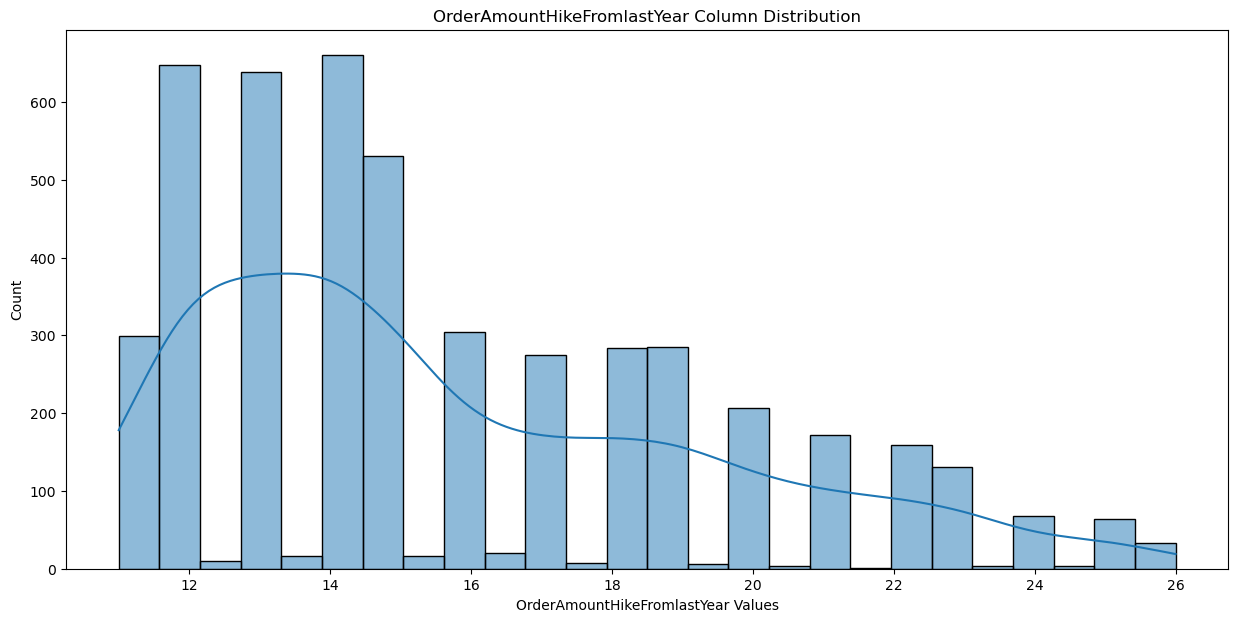

In [227]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_OrderAmountHikeFromlastYear_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderAmountHikeFromlastYear_plt.set_title('OrderAmountHikeFromlastYear Column Distribution',color= 'black')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='black')
plt.show()

In [98]:
OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].interpolate(method = 'linear', inplace=True)

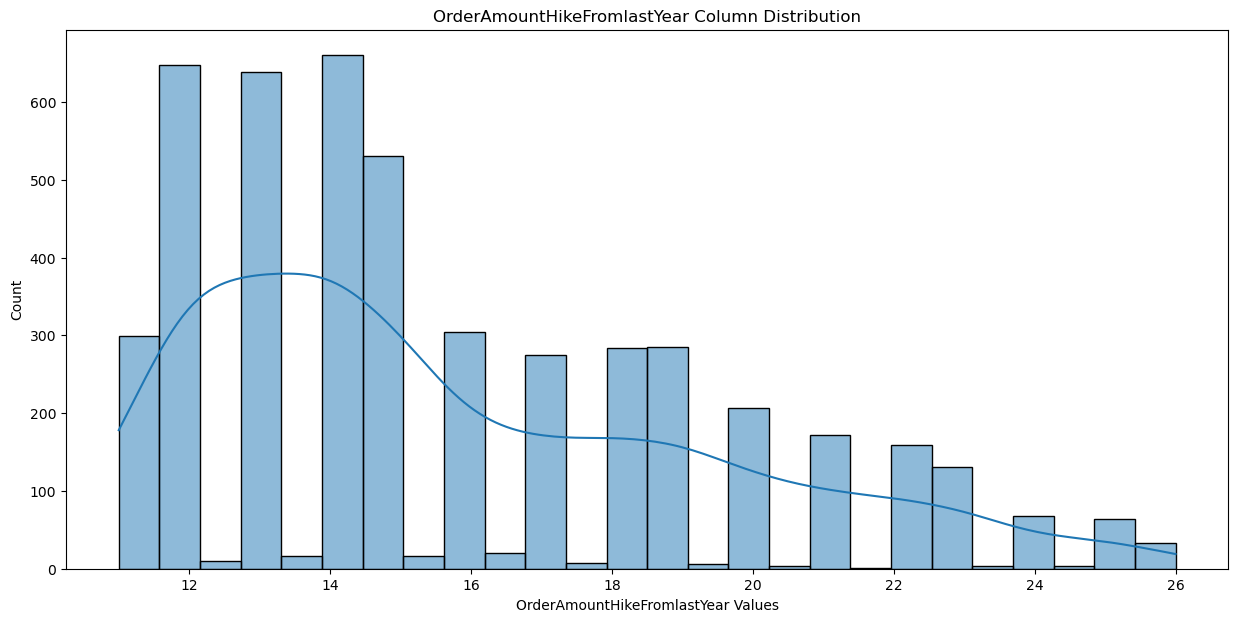

In [228]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_OrderAmountHikeFromlastYear_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderAmountHikeFromlastYear_plt.set_title('OrderAmountHikeFromlastYear Column Distribution',color= 'black')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='black')
plt.show()

In [100]:
OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].isnull().sum() #Validating the changes in nulls

0

### **Column: CouponUsed**

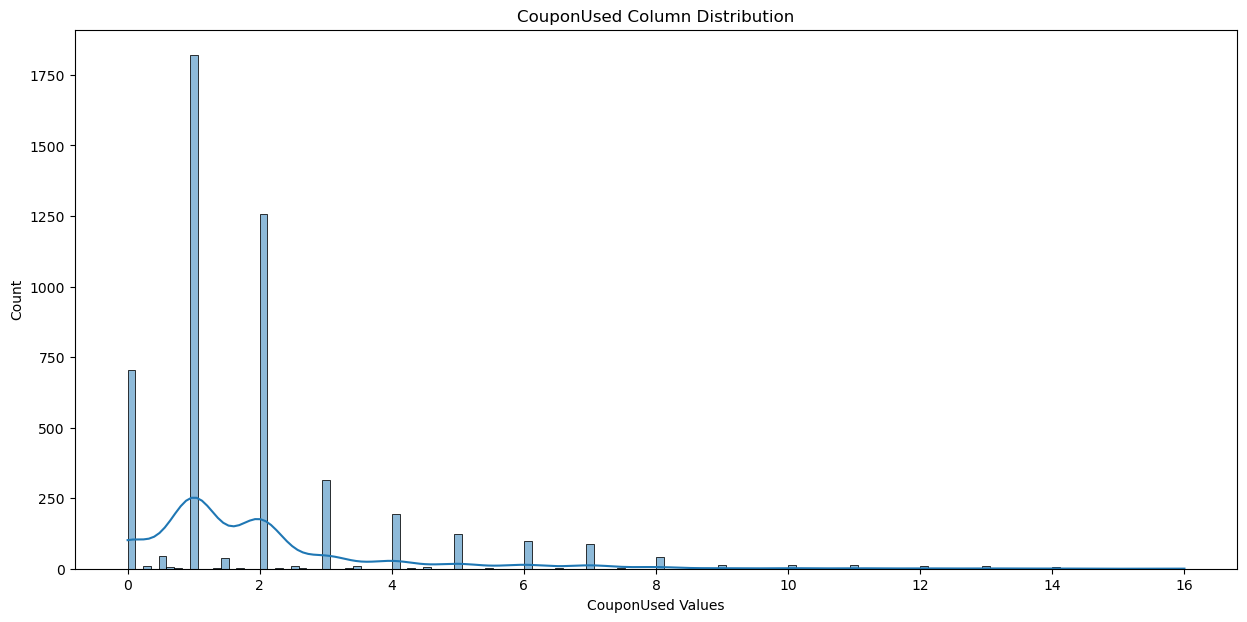

In [229]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_CouponUsed_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['CouponUsed'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_CouponUsed_plt.set_title('CouponUsed Column Distribution',color= 'black')
plt.xlabel('CouponUsed Values', color='black')
plt.show()

In [102]:
OnlineRetail_Interpolate['CouponUsed'].interpolate(method = 'linear', inplace=True)

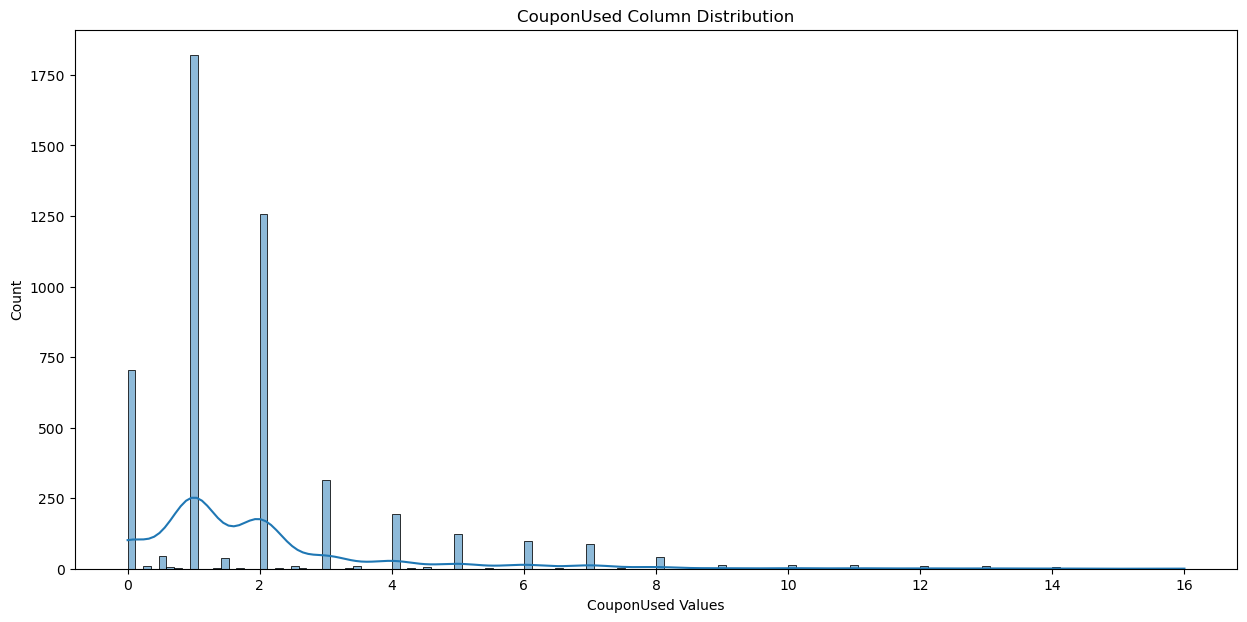

In [230]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_CouponUsed_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['CouponUsed'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_CouponUsed_plt.set_title('CouponUsed Column Distribution',color= 'black')
plt.xlabel('CouponUsed Values', color='black')
plt.show()

In [104]:
OnlineRetail_Interpolate['CouponUsed'].isnull().sum() #Validating the changes in nulls

0

### **Column: OrderCount**

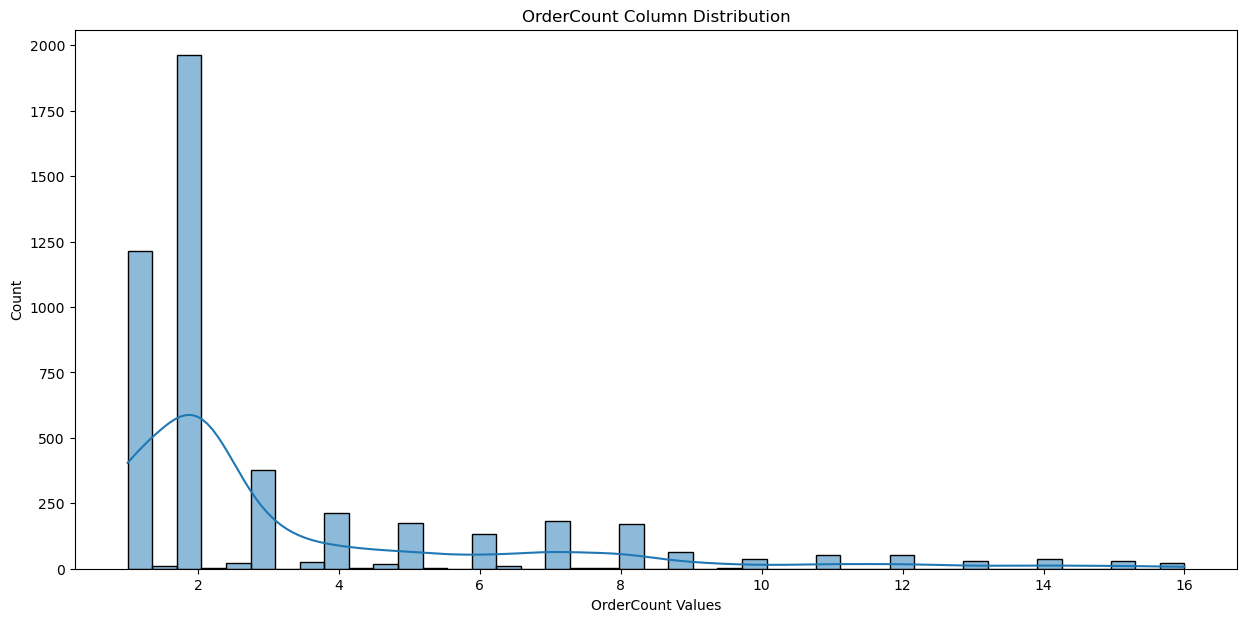

In [231]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_OrderCount_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderCount'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderCount_plt.set_title('OrderCount Column Distribution',color= 'black')
plt.xlabel('OrderCount Values', color='black')
plt.show()

In [106]:
OnlineRetail_Interpolate['OrderCount'].interpolate(method = 'linear', inplace=True)

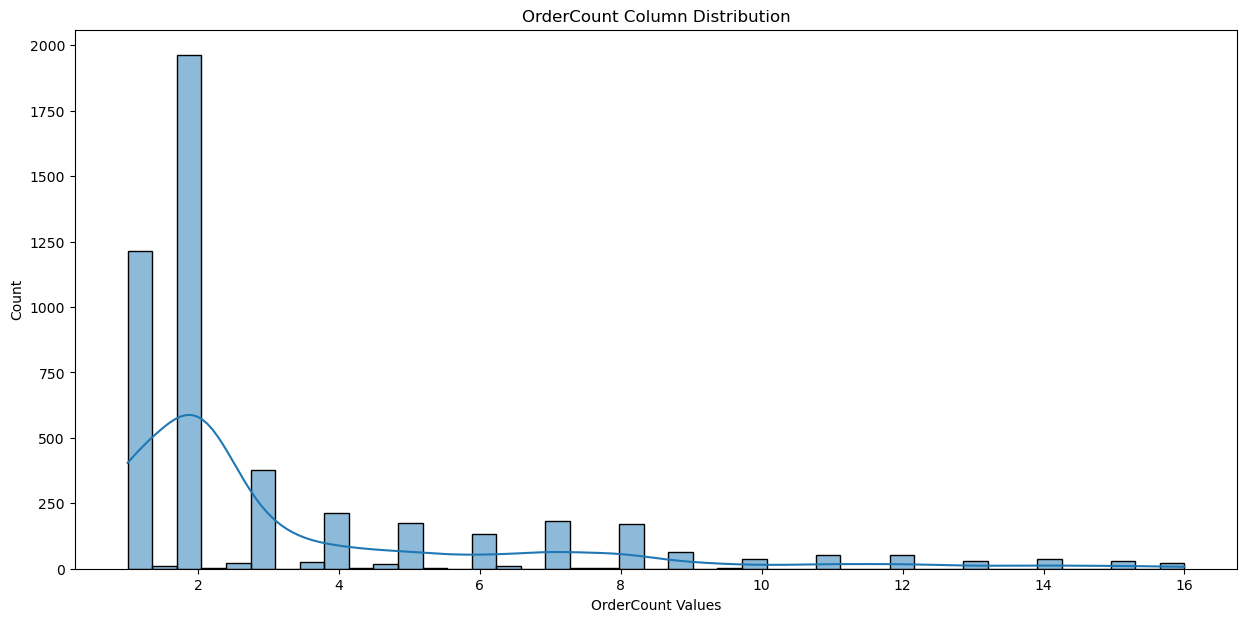

In [232]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_OrderCount_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderCount'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderCount_plt.set_title('OrderCount Column Distribution',color= 'black')
plt.xlabel('OrderCount Values', color='black')
plt.show()

In [108]:
OnlineRetail_Interpolate['OrderCount'].isnull().sum() #Validating the changes in nulls

0

### **Column: DaySinceLastOrder**

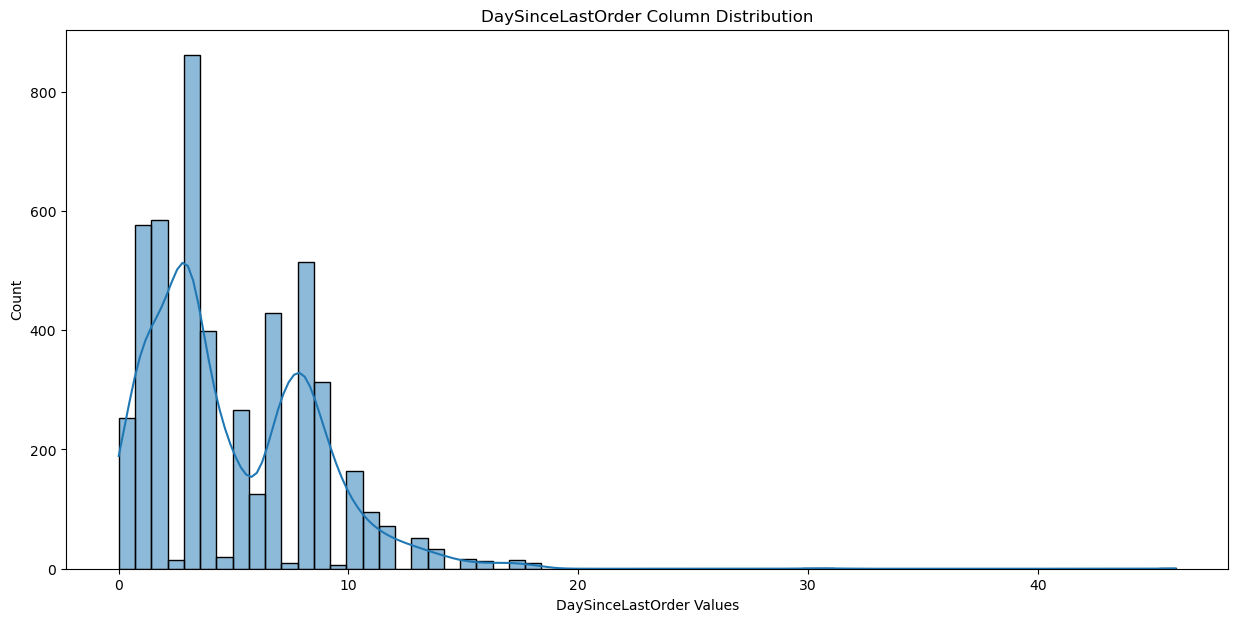

In [233]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_DaySinceLastOrder_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['DaySinceLastOrder'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_DaySinceLastOrder_plt.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.show()

In [110]:
OnlineRetail_Interpolate['DaySinceLastOrder'].interpolate(method = 'linear', inplace=True)

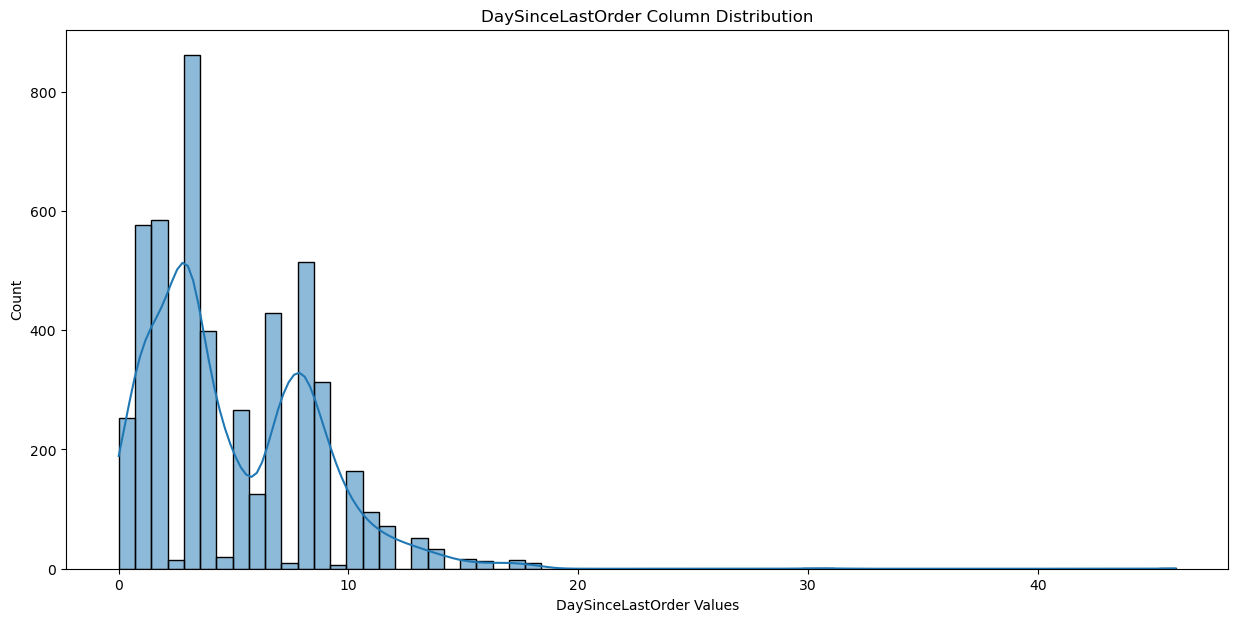

In [234]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_DaySinceLastOrder_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['DaySinceLastOrder'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_DaySinceLastOrder_plt.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.show()

In [112]:
OnlineRetail_Interpolate['DaySinceLastOrder'].isnull().sum() #Validating the changes in nulls

0

### **Nulls:** Final Validation

In [113]:
OnlineRetail_Interpolate.isnull().sum() #Validating the changes in nulls

CustomerID                               0
Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
Gender_Female                            0
Gender_Male

#**Modeling:** Decision Tree


In [114]:
#Spliting the dataset into train test (70,30)
OnlineRetail_Interpolate_y = OnlineRetail_Interpolate['Churn']
OnlineRetail_Interpolate_x = OnlineRetail_Interpolate.drop('Churn', axis=1)
OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_x_test, OnlineRetail_Interpolate_y_train, OnlineRetail_Interpolate_y_test = train_test_split(OnlineRetail_Interpolate_x, OnlineRetail_Interpolate_y, test_size = 0.3, stratify=OnlineRetail_Interpolate_y, random_state=0)

In [115]:
dt.fit(OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_y_train)

DecisionTreeClassifier(random_state=0)

In [116]:
dt_y_pred_test_v2 = dt.predict(OnlineRetail_Interpolate_x_test)
dt_y_pred_train_v2 = dt.predict(OnlineRetail_Interpolate_x_train)

In [117]:
print(classification_report(OnlineRetail_Interpolate_y_train, dt_y_pred_train_v2)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [118]:
print(classification_report(OnlineRetail_Interpolate_y_test, dt_y_pred_test_v2)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1237
           1       0.81      0.79      0.80       217

    accuracy                           0.94      1454
   macro avg       0.88      0.88      0.88      1454
weighted avg       0.94      0.94      0.94      1454



#**Modeling:** Random Forest

In [119]:
rn.fit(OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_y_train)
rn_y_pred_test_v2 = dt.predict(OnlineRetail_Interpolate_x_test)
rn_y_pred_train_v2 = dt.predict(OnlineRetail_Interpolate_x_train)

In [120]:
print(classification_report(OnlineRetail_Interpolate_y_train, rn_y_pred_train_v2)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [121]:
print(classification_report(OnlineRetail_Interpolate_y_test, rn_y_pred_test_v2)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1237
           1       0.81      0.79      0.80       217

    accuracy                           0.94      1454
   macro avg       0.88      0.88      0.88      1454
weighted avg       0.94      0.94      0.94      1454





---



## **Modeling Conclusion**

- We have used Classification Report as a matric of model evaluation to use **Recall** in particular because we want to evaluate the maximum number of churned customers out of the total churned customers.

- Out of the 2 models **(Decision Tree, Random Forest)** in the 3 different null handling methods, We figured out that **Random Forest** has the best **Recall Percentage**, Hence, We have decided to use **Random Forest** as our final model.

- Finally, It terms of **Recall Score** of the 3 null handling methods, There's a close score between **Dropping Nulls** and **Interpolate** and since **Interpolate** is better in terms of keeping rows on a larger scale dataset, We figured out that it is the best way to use in this case.


In [124]:
#Exporting the dataset for further analysis
OnlineRetail_Interpolate.to_csv('OnlineRetail.csv')

# **Data Analysis**

In [169]:
#Reading the data with no One Hot Encoding
data = pd.read_csv(r"C:\Users\Khoi\Downloads\OnlineRetail.csv")
OnlineRetail_V2 = data.copy()

## Q1) **Analyze the  number of days since the last order by the customer to create targeted marketing campaigns and offer personalized discounts**

In [127]:
OnlineRetail_V2['DaySinceLastOrder'].describe() #Quick Statistical Summary

count    4845.000000
mean        4.928689
std         3.617779
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

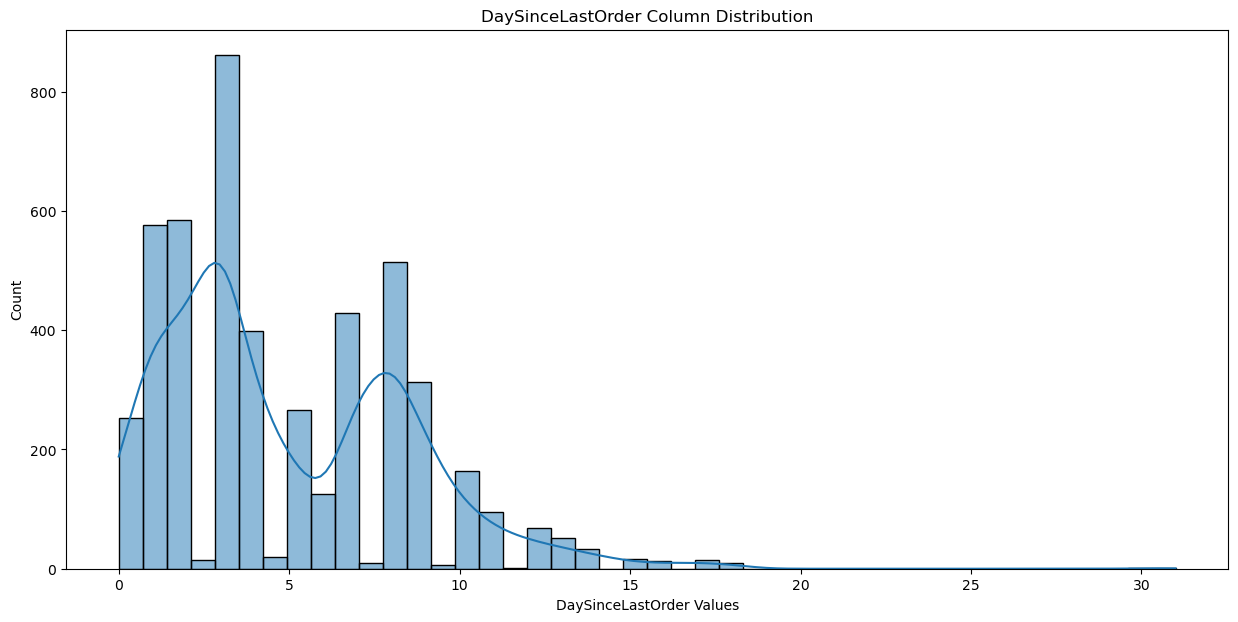

In [129]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
v2_daysincelastorder = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['DaySinceLastOrder'][OnlineRetail_V2['DaySinceLastOrder'] <40 ], kde=True)
v2_daysincelastorder.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

**The Majority of the customers fall into a value of 0 to 10 days since their last order, Hence, Targeting this segment would encourage them to reorder and reduce the 10 days cycle and increase sales.**

In [130]:
#Further Analysis on this point
#Seperating Churned and not churned customers
Churned = OnlineRetail_V2['Churn'] == 1

In [131]:
OnlineRetail_V2['DaySinceLastOrder'][Churned].describe() #Quick Statistical Summary

count    724.000000
mean       3.838398
std        3.444400
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       46.000000
Name: DaySinceLastOrder, dtype: float64

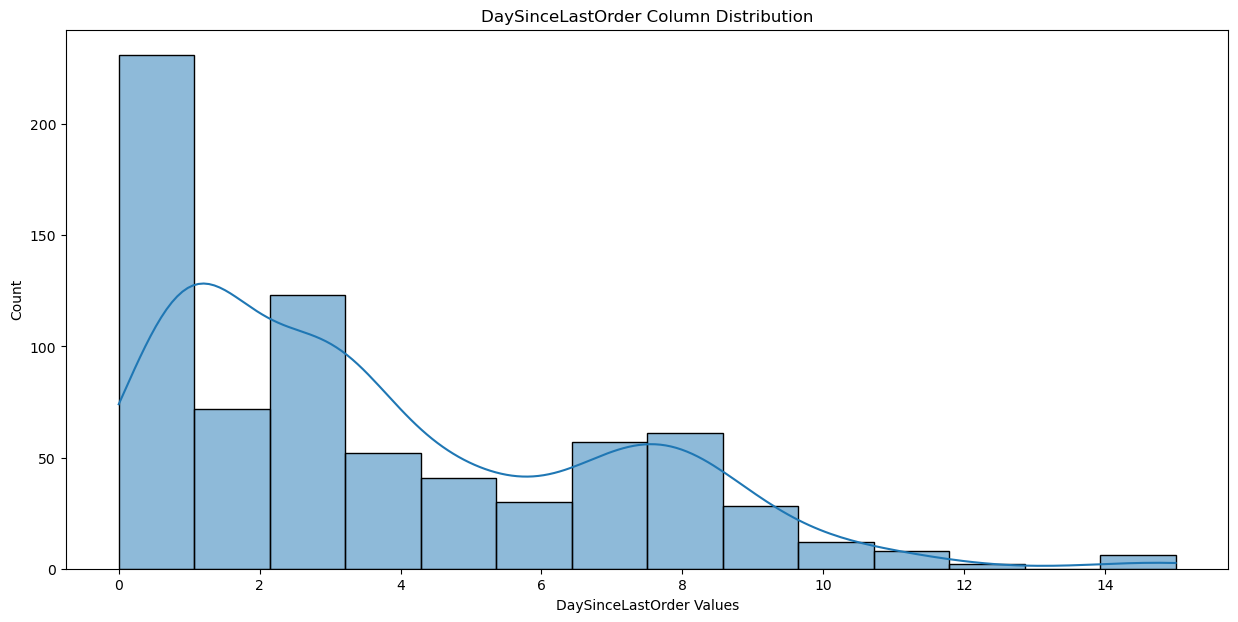

In [133]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
v2_daysincelastorder = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['DaySinceLastOrder'][Churned][OnlineRetail_V2['DaySinceLastOrder'] < 40 ], kde=True)
v2_daysincelastorder.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

**Approximately 50% of customers churn after 3 days of their last order while 75% of customers churn after 6 days of their last order, Moreover, on average, it takes customers from 3 to 4 days to churn after their last order**

## Q2) **Is there any difference in the buying behavior of male and female customers?**

In [171]:
# Counting the number of males and females in the dataset
male_count = OnlineRetail_V2['Gender_Male'].sum()
female_count = OnlineRetail_V2['Gender_Female'].sum()

male_count, female_count

(2887, 1958)

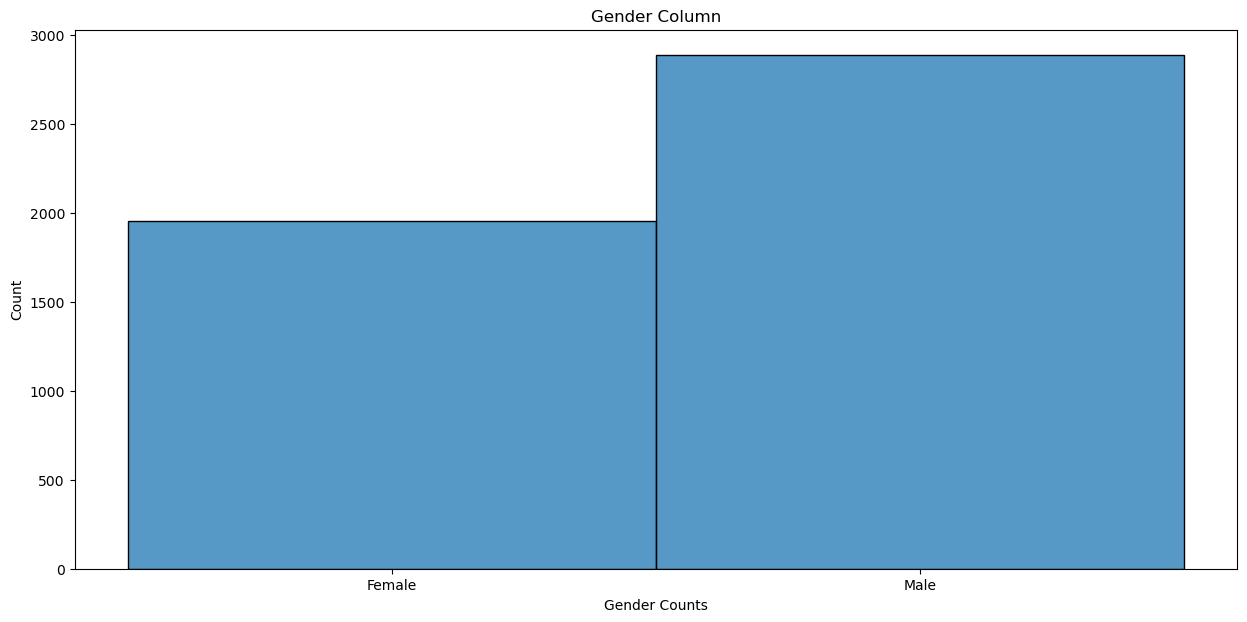

In [173]:
#Figuring out the distribution of gender
data['Gender'] = data.apply(lambda row: 'Male' if row['Gender_Male'] == 1 else 'Female', axis=1)

# Plotting the histogram with the corrected data
plt.figure(figsize=(15,7))
v2_gender = sns.histplot(data=data, x='Gender')
v2_gender.set_title('Gender Column', color='black')
plt.xlabel('Gender Counts', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [174]:
# Filtering data for males and females
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Calculating churn rate
male_churn_rate = male_data['Churn'].mean()
female_churn_rate = female_data['Churn'].mean()

male_churn_rate, female_churn_rate

(0.16210599237963283, 0.13074565883554648)

**Approximately 16,21% of male customers churned and yet only 13,07% on female customers were churned**

In [175]:
#Further Analysis on the Gender behaviour
OnlineRetail_V2['HourSpendOnApp'][male_cst].describe()

count    2906.000000
mean        2.984515
std         0.723423
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: HourSpendOnApp, dtype: float64

In [176]:
OnlineRetail_V2['HourSpendOnApp'][~male_cst].describe()

count    1939.000000
mean        2.978339
std         0.709325
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: HourSpendOnApp, dtype: float64

**Females and Males spend almost the same number of hours on app**

In [180]:
# Summing up the preferred payment mode columns for female customers
payment_modes = ['PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 
                 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 
                 'PreferredPaymentMode_UPI']

# Creating a subset of data for female customers
male_cst = data['Gender'] == 'Male'
female_data = data[~male_cst]

# Calculating the sum for each payment mode
female_payment_mode_sums = female_data[payment_modes].sum()
female_payment_mode_sums

PreferredPaymentMode_Cash on Delivery    174
PreferredPaymentMode_Credit Card         631
PreferredPaymentMode_Debit Card          786
PreferredPaymentMode_E wallet            251
PreferredPaymentMode_UPI                 116
dtype: int64

In [181]:
# Calculating the sum for each payment mode for male customers
male_payment_mode_sums = male_data[payment_modes].sum()
male_payment_mode_sums

PreferredPaymentMode_Cash on Delivery     251
PreferredPaymentMode_Credit Card          894
PreferredPaymentMode_Debit Card          1182
PreferredPaymentMode_E wallet             323
PreferredPaymentMode_UPI                  237
dtype: int64

**Both genders have the same preferred payment mode**

In [183]:
# Identifying the columns for preferred order category
order_cat_columns = [col for col in data.columns if 'PreferedOrderCat_' in col]

# Creating a subset of data for male customers
male_order_data = data[male_cst][order_cat_columns]

# Calculating the sum for each order category for male customers
male_order_cat_sums = male_order_data.sum()

male_order_cat_sums

PreferedOrderCat_Fashion                471
PreferedOrderCat_Grocery                212
PreferedOrderCat_Laptop & Accessory    1173
PreferedOrderCat_Mobile Phone           853
PreferedOrderCat_Others                 178
dtype: int64

In [184]:
# Creating a subset of data for female customers
female_order_data = data[~male_cst][order_cat_columns]

# Calculating the sum for each order category for female customers
female_order_cat_sums = female_order_data.sum()

female_order_cat_sums

PreferedOrderCat_Fashion               352
PreferedOrderCat_Grocery               196
PreferedOrderCat_Laptop & Accessory    835
PreferedOrderCat_Mobile Phone          489
PreferedOrderCat_Others                 86
dtype: int64

**Both gender do have the same categories of interest**

In [185]:
OnlineRetail_V2['OrderCount'][male_cst].describe()

count    2887.000000
mean        3.160143
std         2.949751
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: OrderCount, dtype: float64

In [186]:
OnlineRetail_V2['OrderCount'][~male_cst].describe()

count    1958.000000
mean        3.339717
std         3.064097
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: OrderCount, dtype: float64

In [187]:
#Total number of males orders 
OnlineRetail_V2['OrderCount'][male_cst].sum()

9123.333333333334

In [188]:
#Total number of females' orders 
OnlineRetail_V2['OrderCount'][~male_cst].sum()

6539.166666666667

In [189]:
# Summing up the total orders for males and females
total_orders_male = male_data['OrderCount'].sum()
total_orders_female = female_data['OrderCount'].sum()

# Counting the number of male and female customers
total_males = male_data['CustomerID'].nunique()
total_females = female_data['CustomerID'].nunique()

# Calculating the average order per person for males and females
average_order_per_male = total_orders_male / total_males
average_order_per_female = total_orders_female / total_females

average_order_per_male, average_order_per_female

(3.1601431705345804, 3.339717398706163)

**Although female customers are less than male customers but on average a female customer tends to have an average of 3.3397 order versus 3.1601 per male**

In [190]:
OnlineRetail_V2['CashbackAmount'][male_cst].describe()

count    2887.000000
mean      184.955348
std        48.324982
min         0.000000
25%       150.705000
50%       168.320000
75%       203.680000
max       324.990000
Name: CashbackAmount, dtype: float64

In [191]:
OnlineRetail_V2['CashbackAmount'][~male_cst].describe()

count    1958.000000
mean      186.445158
std        47.235604
min         0.000000
25%       151.702500
50%       170.575000
75%       206.645000
max       324.730000
Name: CashbackAmount, dtype: float64

In [192]:
#Total cashback amount of males
round(OnlineRetail_V2['CashbackAmount'][male_cst].sum(),2)

533966.09

In [193]:
#Total cashback amount of females
round(OnlineRetail_V2['CashbackAmount'][~male_cst].sum(),2)

365059.62

**Males have the share of the lion when it comes to the cash-back amount**

## Q3) **Provide key insights on why our customers churn and possible churn indicators**

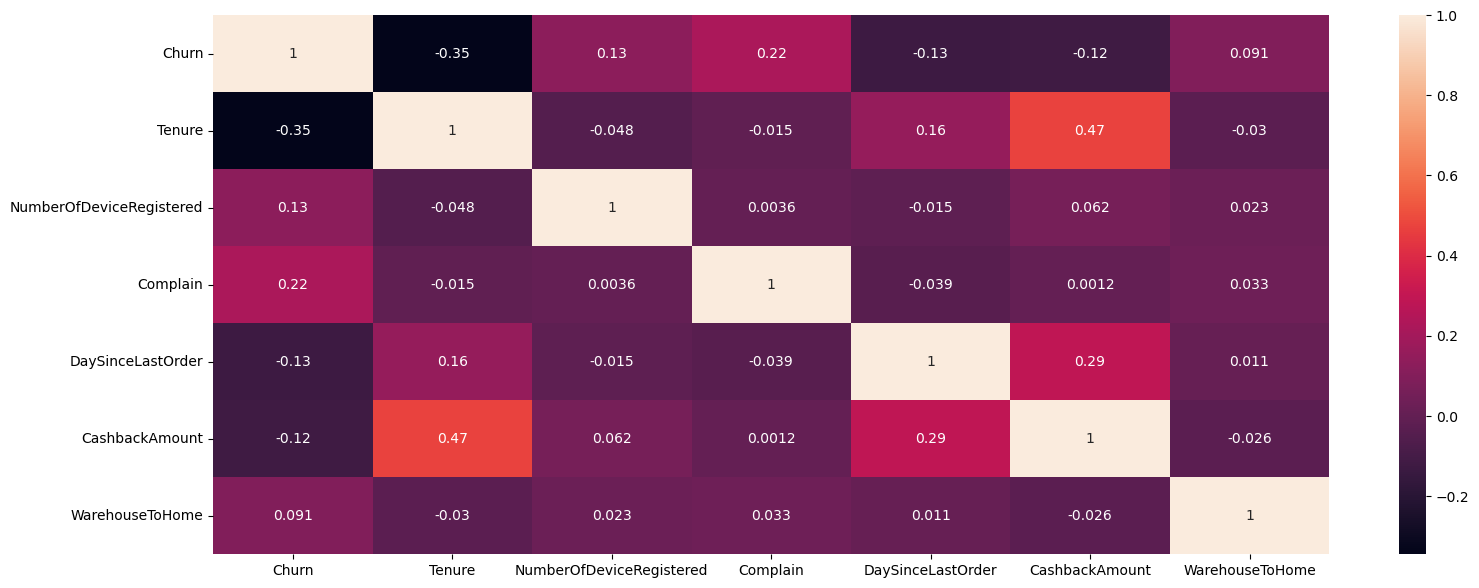

In [197]:
OnlineRetail_Subset = OnlineRetail_V2[['Churn','Tenure','NumberOfDeviceRegistered','Complain','DaySinceLastOrder','CashbackAmount','WarehouseToHome']]
#Let's figure out the correlation between churn and other columns
plt.figure(figsize=(18,7))
sns.heatmap(data = OnlineRetail_Subset.corr(), annot=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

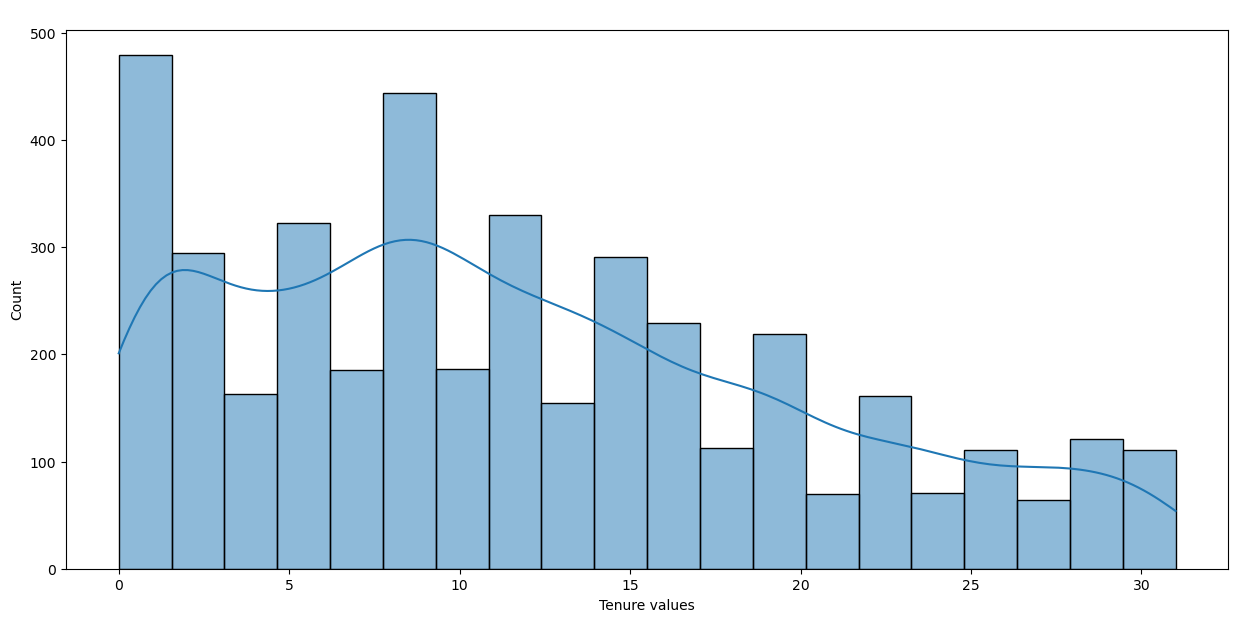

In [198]:
#Figuring out the distribution tenure values for not churned customers to compare it with the distribution of churned customers
plt.figure(figsize=(15,7))
v2_tenure_not_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Tenure'][~Churned],kde=True)
v2_tenure_not_churned.set_title('Tenure Column (Not Churned) Distribution',color= 'white')
plt.xlabel('Tenure values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

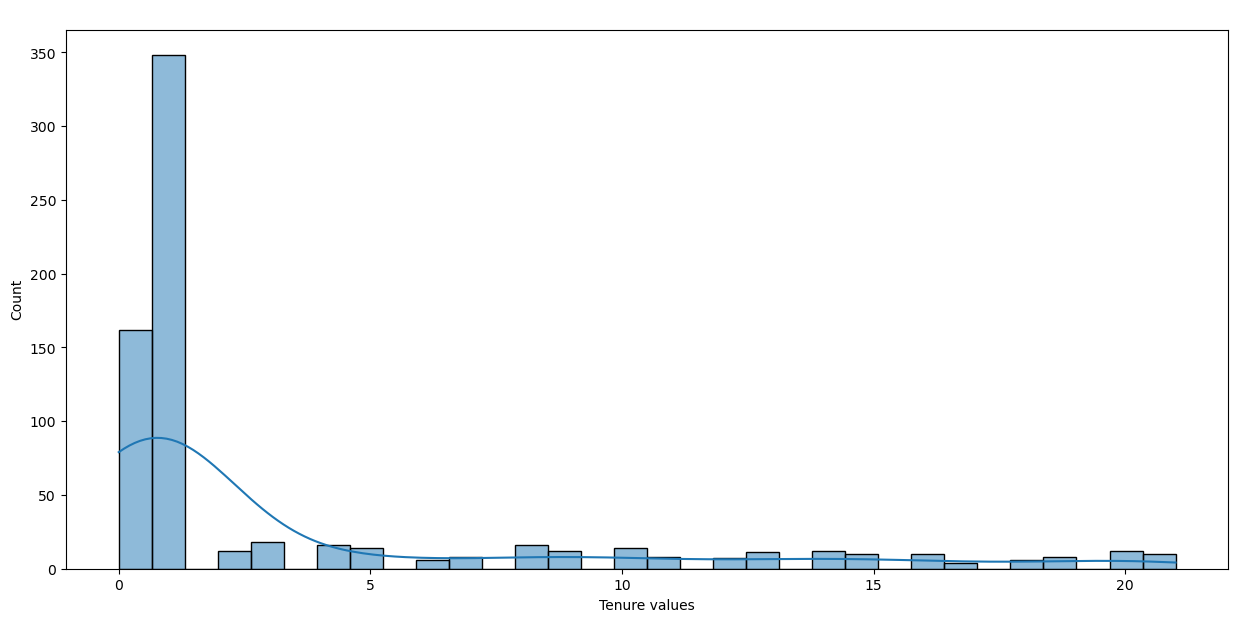

In [199]:
#Figuring out the distribution tenure values for churned customers
plt.figure(figsize=(15,7))
v2_tenure_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Tenure'][Churned],kde=True)
v2_tenure_churned.set_title('Tenure Column (Churned) Distribution',color= 'white')
plt.xlabel('Tenure values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [200]:
#Checking the average tenure for a churned customer
round(OnlineRetail_V2['Tenure'][Churned].mean(),2)

3.59

In [201]:
#Checking the average tenure for a current customer
round(OnlineRetail_V2['Tenure'][~Churned].mean(),2)

11.81

**Tenure is the first churn indicator, The average tenure of churned customer is 3.59 vs 11.81 for not churned customers, Hence, We should pay more attention to our new customers especially in their first 3.59 tenure period, In conclusion, the higher the tenure the higher the loyality the less churn possibility**

In [202]:
#Further Analysis
OnlineRetail_V2['Complain'][Churned].value_counts()

1    380
0    344
Name: Complain, dtype: int64

In [203]:
OnlineRetail_V2['Complain'][~Churned].value_counts()

0    3125
1     996
Name: Complain, dtype: int64

In [204]:
OnlineRetail_V2['Complain'].value_counts()

0    3469
1    1376
Name: Complain, dtype: int64

**Approximately 50% of the churned customers complained and hence we should pay attention to complains as it is the 2nd churn indicator**

## Q4) **Analyze the distance between the warehouse and the customer's home and check if it relates to complains?**

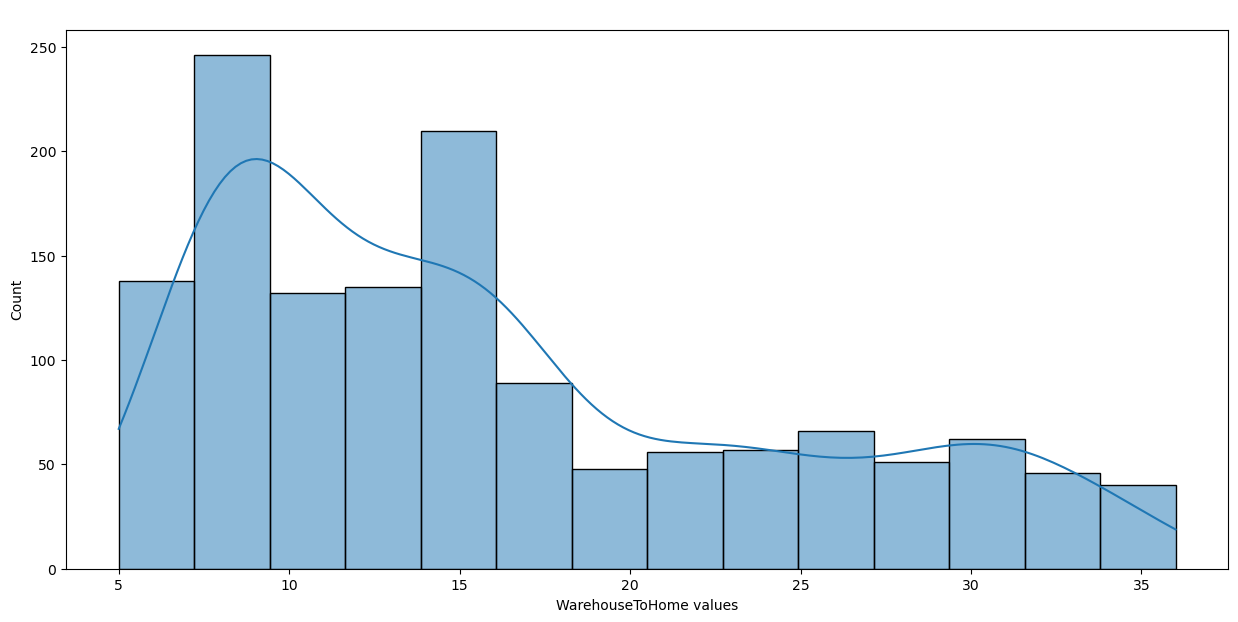

In [206]:
#Figuring out the distribution of WarehouseToHome values for current complaining customers
plt.figure(figsize=(15,7))
v2_warehouse_complain = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['WarehouseToHome'][OnlineRetail_V2['Complain']==1], kde=True)
v2_warehouse_complain.set_title('WarehouseToHome and Complained Distribution',color= 'white')
plt.xlabel('WarehouseToHome values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

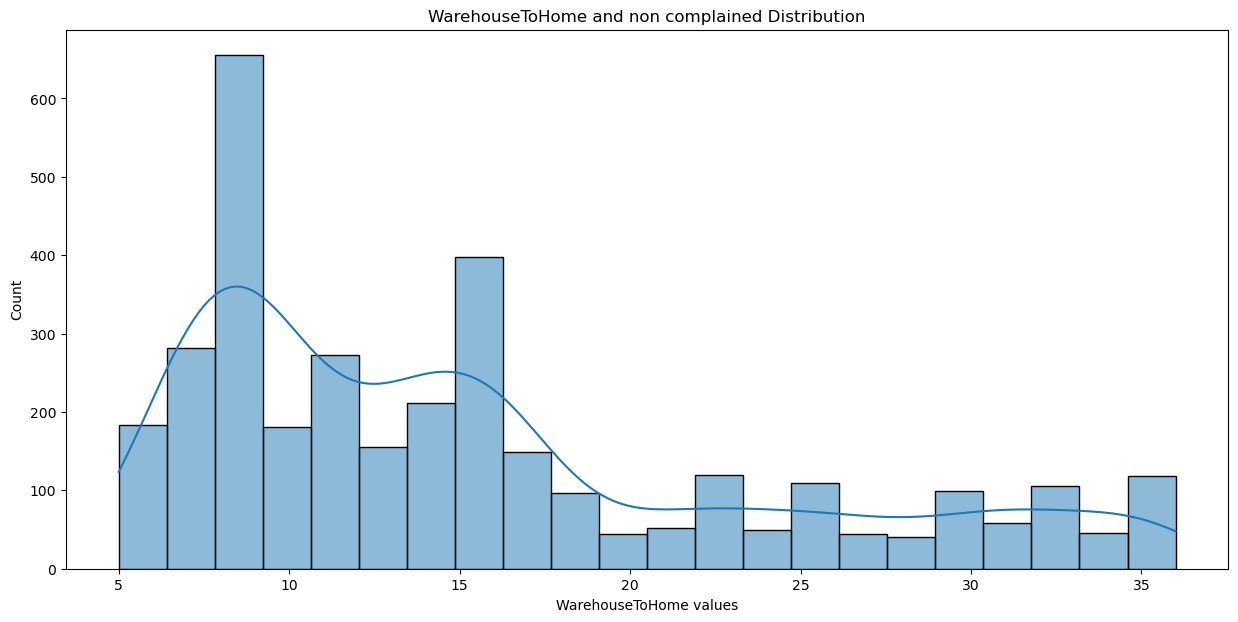

In [208]:
#Figuring out the distribution of WarehouseToHome values for current non-complaining customers
plt.figure(figsize=(15,7))
v2_warehouse_complain = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['WarehouseToHome'][OnlineRetail_V2['Complain']==0], kde=True)
v2_warehouse_complain.set_title('WarehouseToHome and non complained Distribution',color= 'black')
plt.xlabel('WarehouseToHome values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [209]:
OnlineRetail_V2['WarehouseToHome'].describe()

count    4845.000000
mean       15.708772
std         8.309979
min         5.000000
25%         9.000000
50%        14.000000
75%        21.000000
max        36.000000
Name: WarehouseToHome, dtype: float64

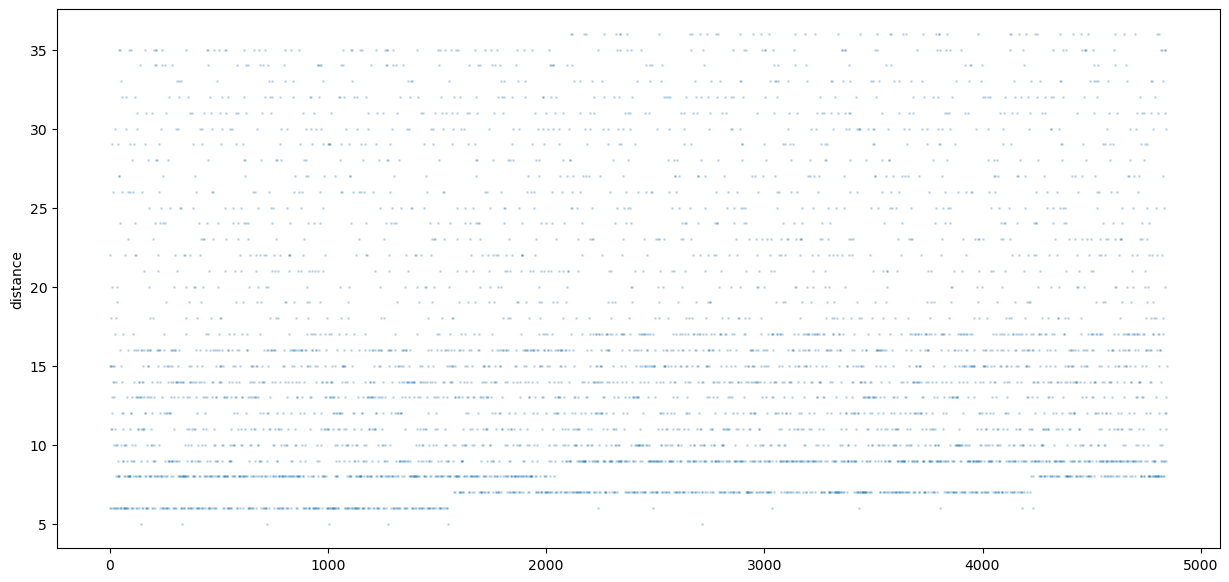

In [210]:
#checking the distribution and density of the distance between customers and our warhouses 
plt.figure(figsize=(15,7))
plt.plot(OnlineRetail_V2['WarehouseToHome'], 'o', markersize=1, alpha=0.2)
plt.ylabel('distance', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

**The majority of the customers are in the distance between 5 to 35 kms from warehouse and hence there's no relation between complains and warehouse to home distance**

## Q5) **Does the number of addresses added by customers impact the churn rate?**

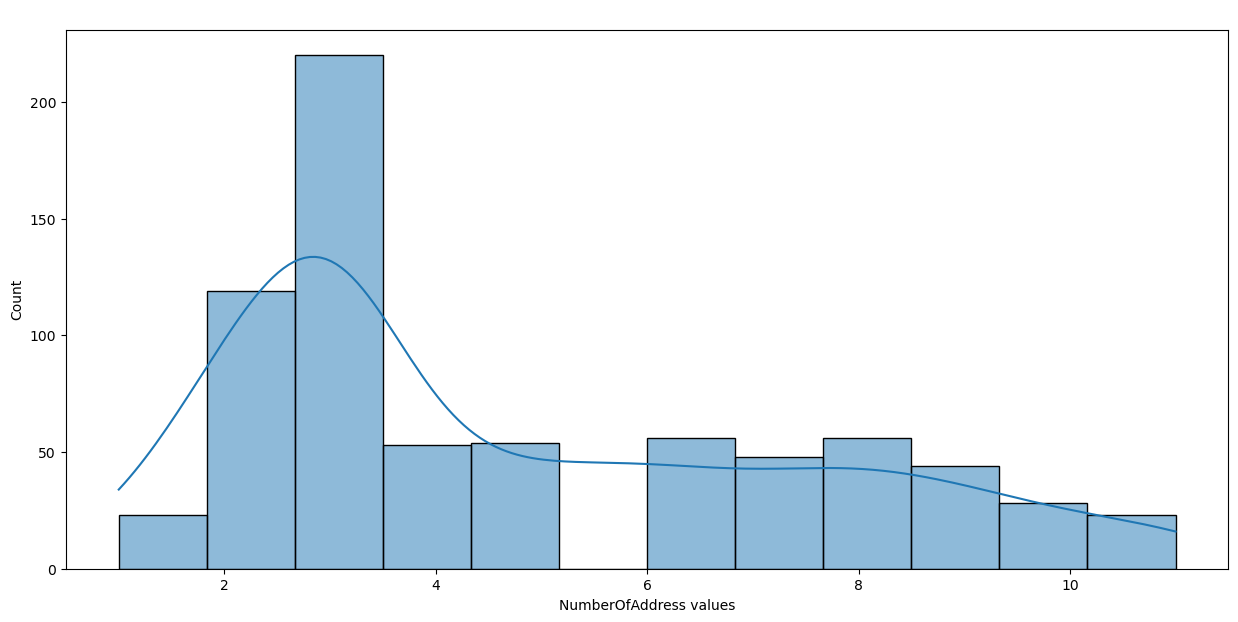

In [212]:
#checking if there any relation between number of addresses and churn 
plt.figure(figsize=(15,7))
v2_numberofaddress_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['NumberOfAddress'][Churned],kde=True)
v2_numberofaddress_churned.set_title('NumberOfAddress Churned Distribution',color= 'white')
plt.xlabel('NumberOfAddress values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

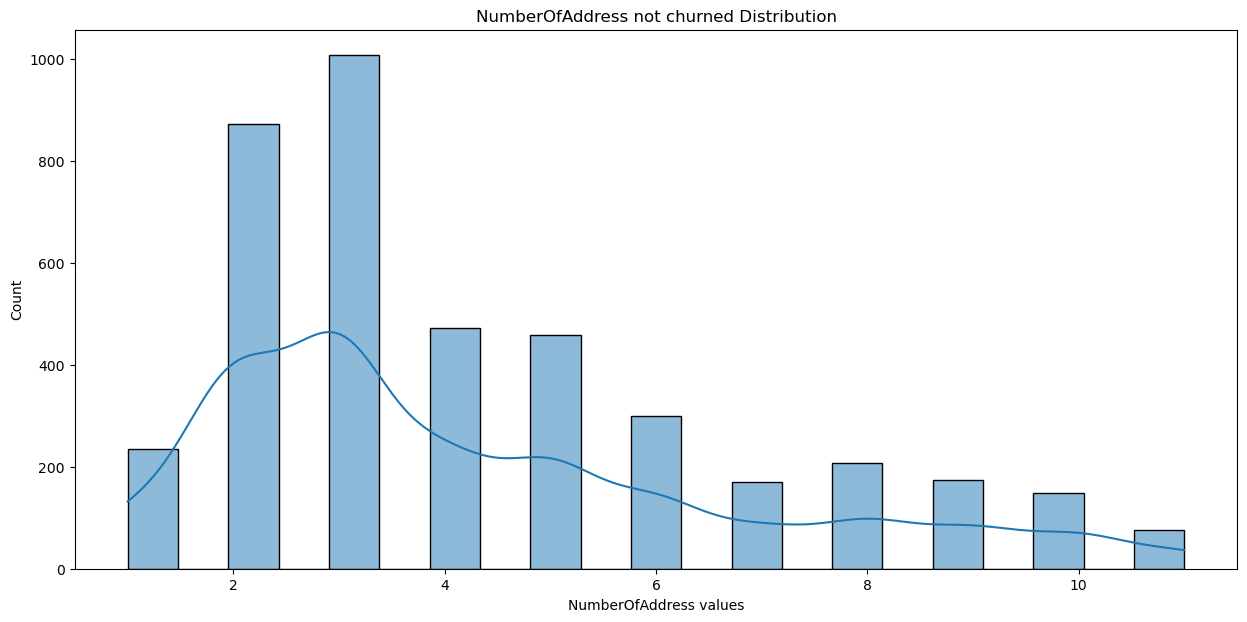

In [213]:
#checking if there any relation between number of addresses and churn 
plt.figure(figsize=(15,7))
v2_numberofaddress_not_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['NumberOfAddress'][~Churned],kde=True)
v2_numberofaddress_not_churned.set_title('NumberOfAddress not churned Distribution',color= 'black')
plt.xlabel('NumberOfAddress values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [214]:
OnlineRetail_V2['NumberOfAddress'][Churned].describe()

count    724.000000
mean       4.767956
std        2.711845
min        1.000000
25%        3.000000
50%        3.500000
75%        7.000000
max       11.000000
Name: NumberOfAddress, dtype: float64

In [215]:
OnlineRetail_V2['NumberOfAddress'][~Churned].describe()

count    4121.000000
mean        4.299442
std         2.518884
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        11.000000
Name: NumberOfAddress, dtype: float64

**In terms of Number of addresses for churned and not churned customers, There's in fact no difference and hence the number of addresses doesn't have an impact on the churn rate**



---
## **Actionable Recommendations:**

- Follow up the customers within 3-6 days since their last order to reduce the churn rate, AS approximately 50% of customers churn after 3 days of their last order, And approximately  75% churn after 6 days of their last order.

- Offer promos for credit and debit card holders, as they represent the most frequently used  payment method for customers whether they’re males or females.

- Upsell a specific category of items which is Laptop & Accessory as the highest number of sales was directed toward that category by males and females.

- Initiate a cash back system on debit and credit card as customers with high cash back percentage tend to not churn.

- Enhance the complain handling department as 50% of churned customer has already complained before they churn.
